# Introduction

This tutorial notebook introduces a comprehensive machine learning pipeline designed to tackle a complex, real-world multi-class classification problem: predicting the duration of a patient's hospital stay across $K=11$ distinct categories. The primary model utilized is Logistic Regression, a foundational statistical method known for its interpretability. Given the challenging nature of healthcare data, which often features complex, non-linear relationships and severe class imbalance, the pipeline is meticulously structured. It moves systematically from raw data loading and exploratory analysis through advanced feature engineering and sophisticated techniques for mitigating imbalance, all leading to robust model training and exhaustive evaluation. The entire process is intended to be a reproducible blueprint for applying Logistic Regression in difficult multi-class settings.

# Objective

To design, build, and evaluate a complete machine learning pipeline utilizing **Logistic Regression for the multi-class classification** (11 categories) of patient hospital stay duration. This involves mandatory steps such as comprehensive data preprocessing (scaling, encoding, feature selection), mitigating severe class imbalance with SMOTE, and maximizing model performance through advanced hyperparameter tuning using Optuna. The final goal is to assess the model’s generalization power using macro-averaged metrics ($\text{F1-score}$, $\text{AUC-ROC}$), understand its linear limitations, and identify areas for future improvement.

# Data Dictionary

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-7zrl">Attribute</th>
    <th class="tg-7zrl">Description</th>
    <th class="tg-7zrl">Data Type</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">case_id</td>
    <td class="tg-7zrl">Case ID registered in Hospital</td>
    <td class="tg-7zrl">Numerical (Integer)</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Hospital_code</td>
    <td class="tg-7zrl">Unique code for the Hospital</td>
    <td class="tg-7zrl">Numerical (Integer)</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Hospital_type_code</td>
    <td class="tg-7zrl">Unique code for the type of Hospital</td>
    <td class="tg-7zrl">Categorical</td>
  </tr>
  <tr>
    <td class="tg-7zrl">City_Code_Hospital</td>
    <td class="tg-7zrl">City Code of the Hospital</td>
    <td class="tg-7zrl">Numerical (Integer)</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Hospital_region_code</td>
    <td class="tg-7zrl">Region Code of the Hospital</td>
    <td class="tg-7zrl">Categorical</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Available Extra Rooms in Hospital</td>
    <td class="tg-7zrl">Number of Extra rooms available in the Hospital</td>
    <td class="tg-7zrl">Numerical (Integer)</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Department</td>
    <td class="tg-7zrl">Department overlooking the case</td>
    <td class="tg-7zrl">Categorical</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Ward_Type</td>
    <td class="tg-7zrl">Code for the Ward type</td>
    <td class="tg-7zrl">Categorical</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Ward_Facility_Code</td>
    <td class="tg-7zrl">Code for the Ward Facility</td>
    <td class="tg-7zrl">Categorical</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Bed Grade</td>
    <td class="tg-7zrl">Condition of Bed in the Ward</td>
    <td class="tg-7zrl">Numerical (Ordinal)</td>
  </tr>
  <tr>
    <td class="tg-7zrl">patientid</td>
    <td class="tg-7zrl">Unique Patient Id</td>
    <td class="tg-7zrl">Numerical (Integer)</td>
  </tr>
  <tr>
    <td class="tg-7zrl">City_Code_Patient</td>
    <td class="tg-7zrl">City Code for the patient</td>
    <td class="tg-7zrl">Numerical (Integer)</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Type of Admission</td>
    <td class="tg-7zrl">Admission Type registered by the Hospital</td>
    <td class="tg-7zrl">Categorical</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Severity of Illness</td>
    <td class="tg-7zrl">Severity of the illness recorded at admission</td>
    <td class="tg-7zrl">Categorical (Ordinal)</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Visitors with Patient</td>
    <td class="tg-7zrl">Number of Visitors with the patient</td>
    <td class="tg-7zrl">Numerical (Integer)</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Age</td>
    <td class="tg-7zrl">Age of the patient</td>
    <td class="tg-7zrl">Categorical (Binned)</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Admission_Deposit</td>
    <td class="tg-7zrl">Deposit at the Admission Time</td>
    <td class="tg-7zrl">Numerical (Float)</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Stay (Target Label)</td>
    <td class="tg-7zrl">Stay Days by the patient</td>
    <td class="tg-7zrl">Categorical (Binned)</td>
  </tr>
</tbody></table>

### [Dataset Link](https://www.kaggle.com/datasets/nehaprabhavalkar/av-healthcare-analytics-ii)

# Pipeline Overview

This pipeline is designed to predict patient hospital stay duration (an $11$-class multi-classification problem) with Logistic Regression as the model.

**1. Data Preparation**

Loading & Splitting: Load the data and immediately split it into $80\%$ training and $20\%$ testing subsets to ensure the final model evaluation is unbiased.EDA: Conduct initial analysis to check data types, detect missing values (especially in Bed Grade), and visualize distributions and correlations to guide feature selection.Feature Cleaning:Convert Age and the target Stay to string types.Drop five irrelevant features (e.g., `case_id, patientid`) to reduce noise and dimensionality.

**2. Preprocessing & Balancing**

A Column Transformer is used to apply separate, non-leaky transformations to numerical and categorical features:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-k9u1{border-color:inherit;color:#1B1C1D;font-size:100%;text-align:left;vertical-align:bottom}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-k9u1">Feature Type</th>
    <th class="tg-7zrl">Missing Value Handling</th>
    <th class="tg-0lax">Scaling/Encoding</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">Numerical</td>
    <td class="tg-7zrl">Impute with Mean</td>
    <td class="tg-0lax">Apply StandardScaler (normalization)</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">Impute with Most Frequent</td>
    <td class="tg-0lax">Apply Ordinal Encoder (to integers)</td>
  </tr>
</tbody>
</table>

- Class Imbalance: Apply SMOTE (Synthetic Minority Over-sampling Technique) only to the training set to create synthetic examples for the minority Stay classes. This ensures all $11$ duration categories are equally represented, preventing the model from biasing predictions toward the most common stays.
- Target Encoding: Use a LabelEncoder to convert the $11$ categorical Stay labels into sequential integers ($0$ through $10$), which is required for the Logistic Regression model.

**3. Modeling and Evaluation**

The final stage focuses on training, optimizing, and rigorously testing the classifier.Core Model: Train an initial Logistic Regression model using an extended $max\_iter=5000$ and assess its baseline performance using $5$-fold cross-validation.Optimization (Optuna): Employ Optuna with the TPE sampler to systematically tune crucial hyperparameters ($C$, $solver$, $penalty$, etc.). This step is designed to find the optimal configuration and maximize the model's predictive power.Final Evaluation: Assess the optimized model using a comprehensive set of macro-averaged metrics (accuracy, precision, recall, F1-score, and AUC-ROC (OvR)). Performance is visualized through a Confusion Matrix, ROC curves, and Precision-Recall curves to thoroughly understand the agent's decision-making and performance across all classes.

# Theories

**Logistic Regression for Multi-Class Classification**

Logistic Regression is a foundational statistical model used in machine learning for solving classification problems. Despite its name, it functions by predicting the probability of an observation belonging to a particular class rather than predicting a continuous value.For multi-class scenarios, such as predicting patient hospital stay duration across $K=11$ categories, the standard binary Logistic Regression model must be extended using specific strategies.

1. Core Theory: Binary Logistic RegressionThe model's foundation lies in binary classification, differentiating between two outcomes (e.g., $y=0$ or $y=1$).

- Linear Combination (z): First, the features (x) are combined linearly using learned weights (w) and a bias (b) to produce a log-odds score:$$z = \mathbf{w}^T \mathbf{x} + b$$
- The Sigmoid Function (σ): This score (z) is then passed through the Sigmoid function (or logistic function), which compresses the output into a probability y^​ between 0 and 1:$$P(y=1|\mathbf{x}) = \sigma(z) = \frac{1}{1 + e^{-z}}$$
- Loss Function: The model is trained by minimizing the Log-Loss (or Binary Cross-Entropy), which measures the divergence between the predicted probabilities (y^​i​) and the true binary labels (yi​):$$\text{Loss} = -\frac{1}{N} \sum_{i=1}^N \left[ y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i) \right]$$

2. Multi-Class Extensions (K > 2)When $K > 2$ classes are involved, the model leverages two primary techniques to produce class probabilities:

- A. Softmax (Multinomial) RegressionSoftmax is the preferred and often default method when the classes are mutually exclusive (an instance belongs to only one class).
    - Model Structure: A single model is trained, yielding $K$ separate linear scores (logits), one for each class ($k$).
    - Softmax Function: The Softmax function is applied to these logits, transforming them into a set of probabilities that sum to 1. This ensures that as the probability of one class increases, the probabilities of all other classes decrease proportionally:$$P(y=k|\mathbf{x}) = \frac{e^{\mathbf{w}_k^T \mathbf{x} + b_k}}{\sum_{j=1}^K e^{\mathbf{w}_j^T \mathbf{x} + b_j}}$$
    - Loss Function: This formulation minimizes the Categorical Cross-Entropy loss, which is the multi-class extension of Log-Loss.

- B. One-vs-Rest (OvR)The OvR strategy is simpler and used when the softmax solver is not available or desired.
    - Model Structure: This approach trains $K$ independent binary classifiers.
    - Classifier Operation: Each classifier ($k$) is trained to distinguish that specific class $k$ (the positive class) from all other $K-1$ classes combined (the negative class).
    - Prediction: For a new instance $\mathbf{x}$, all $K$ classifiers provide a probability score. The final prediction is simply the class associated with the classifier that outputs the highest probability score.

**Related Theories**

**Regularization**

Regularization is a technique applied during the model training process to prevent overfitting by explicitly penalizing overly large parameter weights ($\mathbf{w}$). By adding a penalty term to the original loss function, regularization favors simpler models that generalize better to unseen data.
- L2 Regularization (Ridge): This method adds a penalty proportional to the squared magnitude of the weights to the loss function: $\lambda \sum_{j} w_j^2$. Its primary effect is weight shrinkage, forcing all weights closer to zero without setting them to zero entirely.
- L1 Regularization (Lasso): This method adds a penalty proportional to the absolute magnitude of the weights: $\lambda \sum_{j} |w_j|$. L1 promotes sparsity, meaning it can force the weights of less important features to become exactly zero, effectively achieving automatic feature selection.
- ElasticNet: This technique combines both L1 and L2 penalties: $\lambda_1 \sum_{j} |w_j| + \lambda_2 \sum_{j} w_j^2$. The $\text{l1\_ratio}$ parameter controls the balance between the L1 (sparsity) and L2 (shrinkage) components.The strength of this penalty is controlled by the hyperparameter $C$, which is the inverse of the regularization strength $\lambda$ ($C = 1/\lambda$). Therefore, a smaller value of $C$ implies stronger regularization. In the pipeline, Optuna is used to tune both the penalty type (L1, L2, ElasticNet) and the hyperparameter $C$ to find the optimal trade-off between model complexity and performance.

**Solvers (Optimization Algorithms)**

Solvers are the algorithms responsible for optimizing the loss function during training—that is, iteratively updating the model's weights to find the minimum of the loss surface. The choice of solver is crucial as it determines which regularization types and multi-class strategies are supported.

- `lbfgs`: A popular quasi-Newton method that often converges quickly and supports the Softmax (Multinomial) strategy but is limited to L2 regularization or no penalty.
- `liblinear`: Suitable for smaller datasets, this solver natively supports the One-vs-Rest (OvR) strategy and can handle both L1 and L2 penalties.
- `saga`: A robust Stochastic Average Gradient descent algorithm that is highly scalable for large datasets. Its versatility is critical, as it supports Softmax (Multinomial) and is compatible with all penalty types (L1, L2, ElasticNet, and None).The pipeline incorporates checking valid solver-penalty combinations to ensure compatibility before attempting optimization.

**Class Imbalance**

Class Imbalance is a common problem in classification where some target categories have significantly fewer samples than others (e.g., $27.43\%$ of samples in one class vs. $0.85\%$ in another). If left unaddressed, the model becomes biased toward the majority classes, leading to poor predictive power for the minority classes.To mitigate this, two primary strategies are used:

- SMOTE (Synthetic Minority Over-sampling Technique): This technique addresses imbalance by generating synthetic samples for the minority classes. It does this by interpolating between existing minority instances in the feature space. This is applied only to the training set to prevent data leakage.
- Class Weights: The parameter $\text{class\_weight}=\text{'balanced'}$ can be passed to the model. This internally adjusts the loss function to apply a larger penalty when an instance from a minority class is misclassified. This forces the model to treat prediction errors on rare classes as more severe.

**Cross-Validation**

Cross-Validation is a statistical technique used to assess a model's generalization capability and stability by training and testing the model on different partitions of the available data.

- In $k$-fold cross-validation (e.g., $5$-fold), the data is divided into $k$ equal segments. The model is trained $k$ times, each time leaving one fold out for testing.
- The reported metric (e.g., accuracy) is the average performance across the $k$ test sets. This ensures that the performance estimate is not dependent on a single, random train-test split, providing a more reliable measure of model stability.

**Hyperparameter Tuning (Optuna)**

Hyperparameter Tuning is the process of selecting the best possible configuration values for the hyperparameters, which are not learned during the training process (e.g., $C$, $solver$, $\text{max\_iter}$).

Optuna is an advanced optimization framework that automates this search. It uses efficient sampling techniques, such as the Tree-structured Parzen Estimator (TPE), to intelligently propose hyperparameter combinations that are likely to yield better results based on past trials. The goal is to maximize the cross-validation score by systematically optimizing parameters like regularization strength ($C$), optimization algorithm ($\text{solver}$), penalty type, and convergence criteria ($\text{tol}, \text{max\_iter}$).

**Model Evaluation Metrics and Interpretation**

Evaluating a multi-class classifier requires a robust set of metrics that go beyond simple accuracy, especially when dealing with imbalanced datasets. The following concepts are crucial for understanding model performance.

**Accuracy**

Accuracy is the most intuitive metric, defined as the proportion of total predictions that were correct:$$\text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}}$$While simple, accuracy can be highly misleading in datasets with severe class imbalance. A model predicting the majority class all the time could achieve high accuracy while completely failing on the minority classes. Consequently, for the patient stay duration problem, macro-averaged metrics are necessary for a fairer assessment.

**Precision, Recall, and the F1-Score**

These metrics are derived from the Confusion Matrix and provide insight into class-specific performance. They are typically calculated for each class $k$ individually, treating it as a "positive" class against all others (One-vs-Rest).

- Precision (Precisionk​): Measures the correctness of the positive predictions. Among all instances the model predicted as class k, what fraction truly belonged to class k?$$\text{Precision}_k = \frac{\text{True Positives}_k}{\text{True Positives}_k + \text{False Positives}_k}$$
- Recall (Recallk​): Measures the model's ability to find all positive instances. Among all instances that truly belong to class k, what fraction did the model correctly identify? (Also known as the True Positive Rate, TPR).$$\text{Recall}_k = \frac{\text{True Positives}_k}{\text{True Positives}_k + \text{False Negatives}_k}$$
- F1-Score (F1k​): This is the harmonic mean of precision and recall:$$\text{F1}_k = 2 \cdot \frac{\text{Precision}_k \cdot \text{Recall}_k}{\text{Precision}_k + \text{Recall}_k}$$It provides a single, balanced score that penalizes models with extremely poor performance in either precision or recall.

The Macro-Average is then calculated by averaging the individual $\text{F1}_k$ scores across all classes. This approach ensures that every single class (even the rare ones) contributes equally to the final metric, preventing the majority classes from dominating the score. In the pipeline, low macro-averaged scores (e.g., $0.205$ precision, $0.189$ F1) suggest poor performance on a per-class basis despite the use of SMOTE.

**AUC-ROC (Area Under the Receiver Operating Characteristic Curve)**

The ROC curve plots the True Positive Rate (Recall) against the False Positive Rate (FPR) at various classification probability thresholds.
- False Positive Rate (FPR): Defined as $\text{FPR} = \frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}}$. It represents the rate of instances incorrectly classified as positive.
- AUC: The Area Under the Curve (AUC) measures the model's ability to discriminate between classes. An AUC of $0.5$ suggests the model performs no better than random guessing, while an AUC of $1.0$ is perfect discrimination.
- Multi-Class AUC: For $11$ classes, the AUC is calculated using the One-vs-Rest (OvR) approach, generating an AUC score for each class versus all others. An AUC-ROC of $0.734$ (as observed in the pipeline) suggests the model's probabilistic rankings are moderately effective at distinguishing the classes, which is often a more reliable indicator than the hard classification accuracy.

**Precision-Recall Curve**

Similar to the ROC curve, the Precision-Recall Curve plots precision against recall at various probability thresholds. This visualization is particularly insightful for imbalanced datasets because it focuses specifically on the performance of the positive class without incorporating the True Negatives (which are usually abundant in imbalanced settings). By examining these OvR curves, one can see that some minority classes (e.g., 81-90 days with $\text{AUC} \approx 0.8997$) are much easier to predict than others (e.g., 61-70 days with $\text{AUC} \approx 0.5185$).

**Confusion Matrix**

The Confusion Matrix provides a direct, non-abstract view of the classification results. It is an $K \times K$ table (here, $11 \times 11$) where:

- Rows represent the True Labels (what the stay duration actually was).
- Columns represent the Predicted Labels (what the model predicted).

The cells along the diagonal represent the correct predictions (True Positives for each class), while the off-diagonal cells show the misclassifications (False Positives and False Negatives). Visualizing this matrix as a heatmap quickly reveals which classes are most frequently mistaken for others, explaining the overall low accuracy.

**Visualization of Decision Boundaries**

To understand how the Logistic Regression model separates the data, two visualizations are used:

- Decision Boundary (2D): This visualization plots the data points against two key features (e.g., Available Extra Rooms and Visitors with Patient) while holding other features constant at their mean values. Since Logistic Regression produces linear decision boundaries, this plot reveals the straight lines used by the classifier to divide the feature space into $11$ regions.
- Sigmoid Curve (Binary): By examining a simplified binary subset (e.g., $0$-$10$ Days vs. $\text{More than 100 Days}$), one can plot the Sigmoid function itself, showing how the model's predicted probability changes as a single feature (like Admission_Deposit) increases. This provides a clear theoretical link between the feature's value and the likelihood of a positive outcome.

# Import libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder, LabelBinarizer, label_binarize
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    auc,
    roc_curve,
)

# Install optuna (if not already installed)
!pip install optuna

# Ignore FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

# Display all columns of the dataframe
pd.options.display.max_columns = None

/opt/anaconda3/envs/agathon/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load Dataset

In [3]:
import kagglehub

path = kagglehub.dataset_download("nehaprabhavalkar/av-healthcare-analytics-ii")

print("Path to dataset files:", path)

input_file=path + '/healthcare/train_data.csv'
df_train  = pd.read_csv(input_file)
df_train

Path to dataset files: /Users/markmerkouchev/.cache/kagglehub/datasets/nehaprabhavalkar/av-healthcare-analytics-ii/versions/1


,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


# Split dataset

The dataset is divided into features (x) and the target variable (y, which is 'Stay'). Then, x and y are further split into training and testing sets. Splitting data is a core practice in machine learning to prevent overfitting. A model that performs well on training data but poorly on unseen test data is overfit. By evaluating on a separate test set, we get a more realistic estimate of the model's generalization ability.

In [4]:
x = df_train.drop('Stay', axis=1) 
y = df_train['Stay'] 

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

# Print the shapes of the resulting sets
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (254750, 17)
y_train shape: (254750,)
X_test shape: (63688, 17)
y_test shape: (63688,)


# Exploratory Data Analysis (EDA)

## Basic statistics and distribution of the data

This section performs initial data inspection and visualization to understand the characteristics of the training data, including data types, summary statistics, missing values, and distributions of key features.

* Understanding the Data: Gaining insights into the structure, content, and quality of the dataset.

* Identifying Patterns: Discovering trends, anomalies, and relationships between variables.

* Detecting Issues: Uncovering missing values, outliers, and inconsistencies that need to be addressed in preprocessing.

* Informing Feature Engineering: Guiding decisions on how to transform or create new features.

In [5]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254750 entries, 231676 to 121958
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            254750 non-null  int64  
 1   Hospital_code                      254750 non-null  int64  
 2   Hospital_type_code                 254750 non-null  object 
 3   City_Code_Hospital                 254750 non-null  int64  
 4   Hospital_region_code               254750 non-null  object 
 5   Available Extra Rooms in Hospital  254750 non-null  int64  
 6   Department                         254750 non-null  object 
 7   Ward_Type                          254750 non-null  object 
 8   Ward_Facility_Code                 254750 non-null  object 
 9   Bed Grade                          254656 non-null  float64
 10  patientid                          254750 non-null  int64  
 11  City_Code_Patient                  2510

In [6]:
x_train.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,254750.000000,254750.000000,254750.000000,254750.000000,254656.000000,254750.000000,251096.000000,254750.000000,254750.000000
mean,159257.100919,18.313252,4.772620,3.197766,2.626154,65756.588035,7.240402,3.284836,4879.660043
std,91943.046558,8.631398,3.104076,1.169690,0.872845,37956.994011,4.728393,1.765235,1086.938886
min,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1801.000000
25%,79611.750000,11.000000,2.000000,2.000000,2.000000,32900.250000,4.000000,2.000000,4185.000000
50%,159248.500000,19.000000,5.000000,3.000000,3.000000,65743.000000,8.000000,3.000000,4739.000000
75%,238877.750000,26.000000,7.000000,4.000000,3.000000,98429.000000,8.000000,4.000000,5408.000000
max,318437.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [7]:
x_train.duplicated().sum()

0

In [8]:
x_train.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              94
patientid                               0
City_Code_Patient                    3654
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

In [9]:
x_test.isnull().sum()

case_id                                0
Hospital_code                          0
Hospital_type_code                     0
City_Code_Hospital                     0
Hospital_region_code                   0
Available Extra Rooms in Hospital      0
Department                             0
Ward_Type                              0
Ward_Facility_Code                     0
Bed Grade                             19
patientid                              0
City_Code_Patient                    878
Type of Admission                      0
Severity of Illness                    0
Visitors with Patient                  0
Age                                    0
Admission_Deposit                      0
dtype: int64

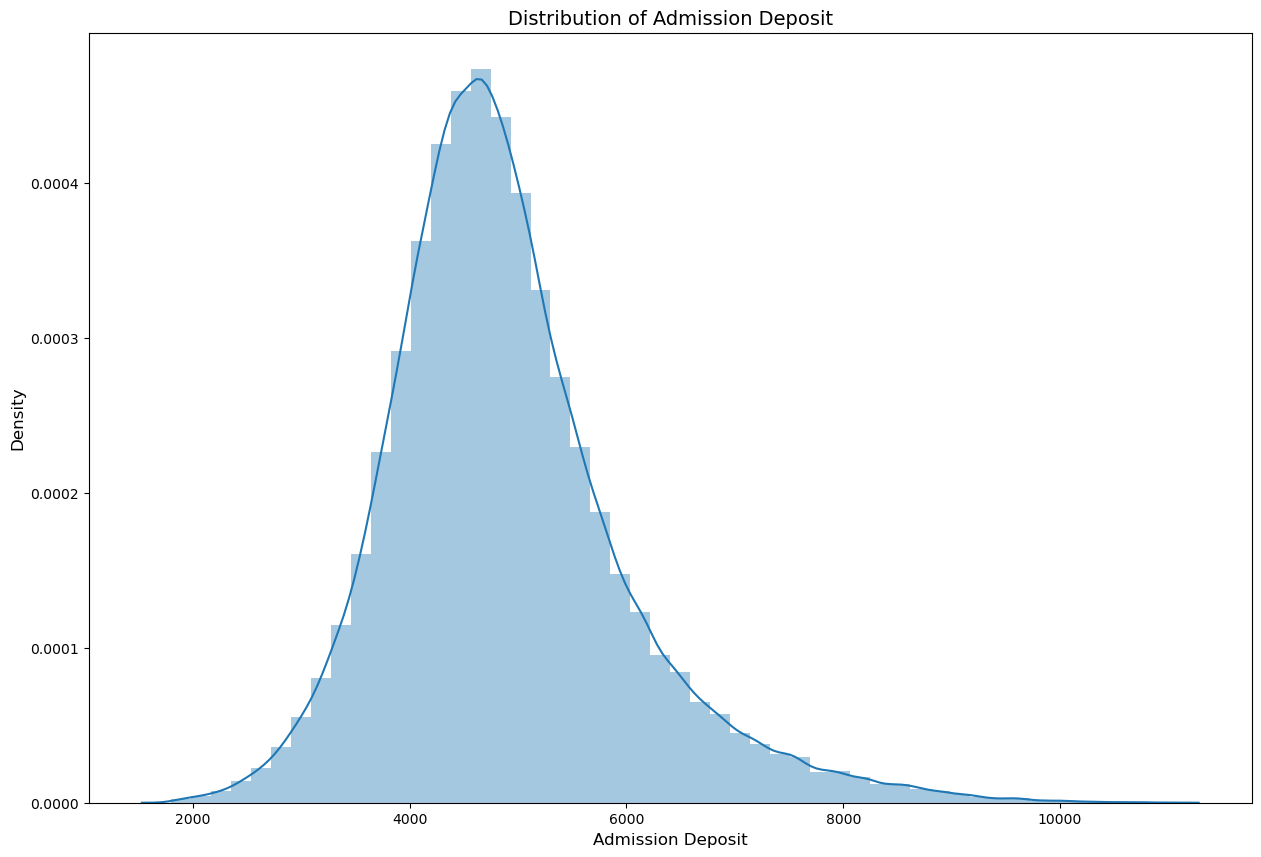

In [10]:
# Set the figure size
plt.figure(figsize=(15, 10)) 

# Create the distribution plot
sns.distplot(x_train['Admission_Deposit'])

# Set chart title
plt.title('Distribution of Admission Deposit', fontsize=14)

# Set x-axis label
plt.xlabel('Admission Deposit', fontsize=12)

# Set y-axis label
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.show()

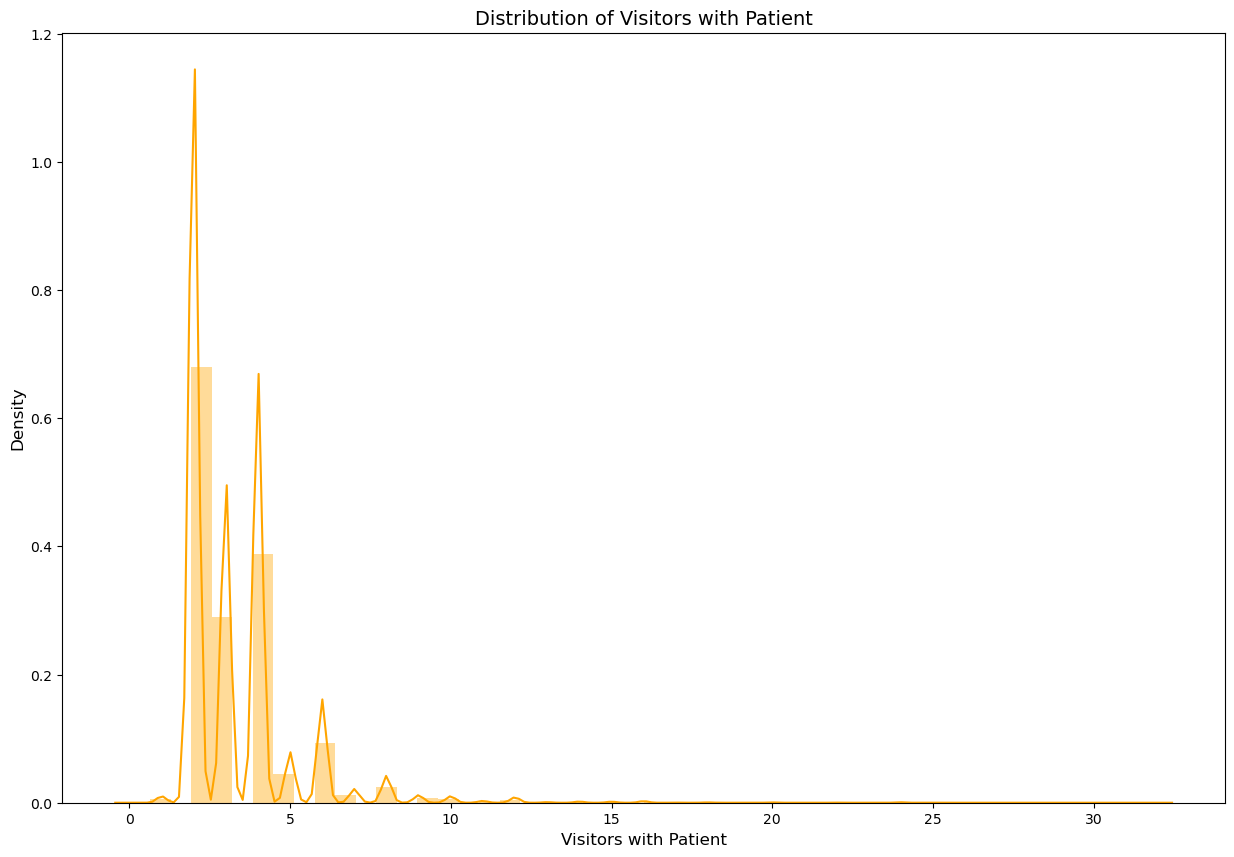

In [11]:
# Set the figure size
plt.figure(figsize=(15, 10)) 

# Create the distribution plot
sns.distplot(x_train['Visitors with Patient'], color='orange')

# Set chart title
plt.title('Distribution of Visitors with Patient', fontsize=14)

# Set x-axis label
plt.xlabel('Visitors with Patient', fontsize=12)

# Set y-axis label
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.show()

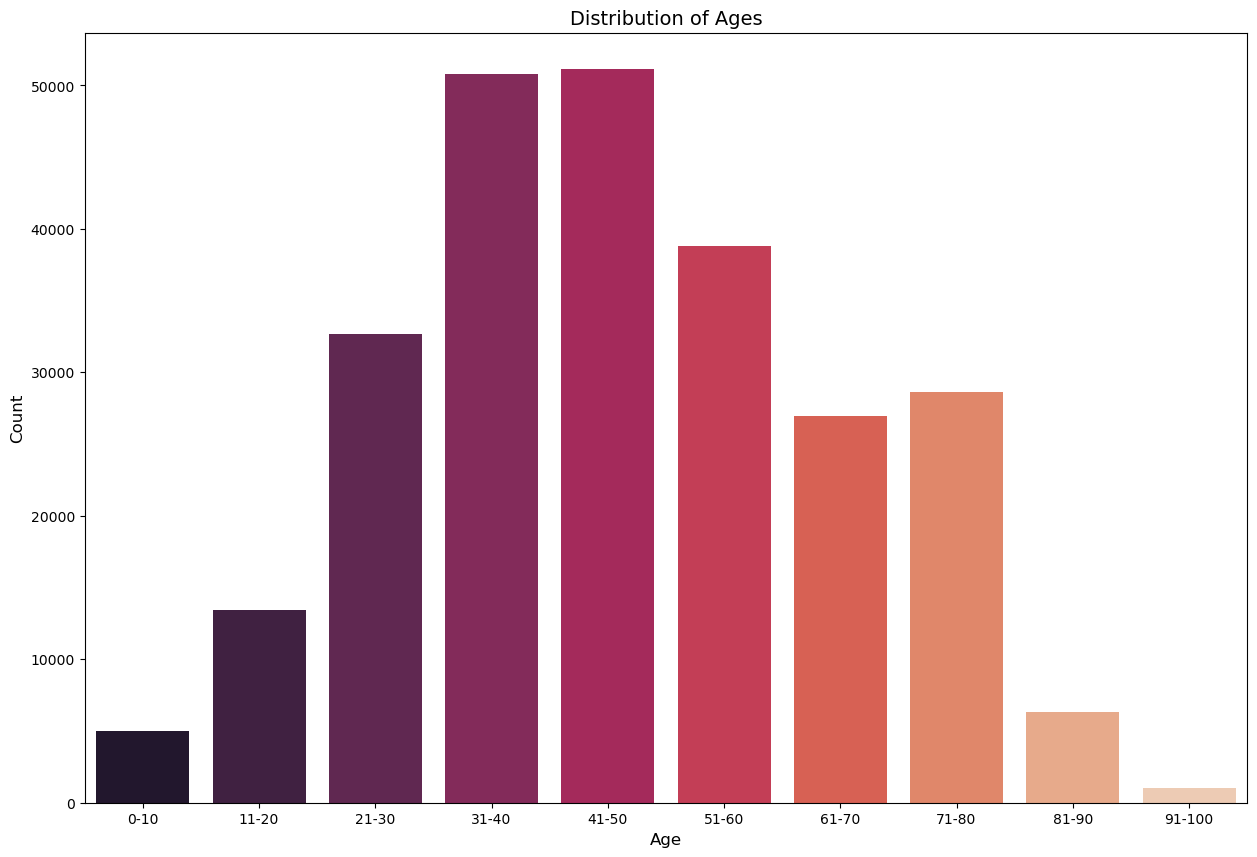

In [12]:
# Set the figure size
plt.figure(figsize=(15, 10)) 

# Create the count plot
sns.countplot(x=x_train['Age'].sort_values(), data=x_train, palette='rocket') 

# Set the axis labels
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Set the title
plt.title('Distribution of Ages', fontsize=14)

# Show the plot
plt.show()

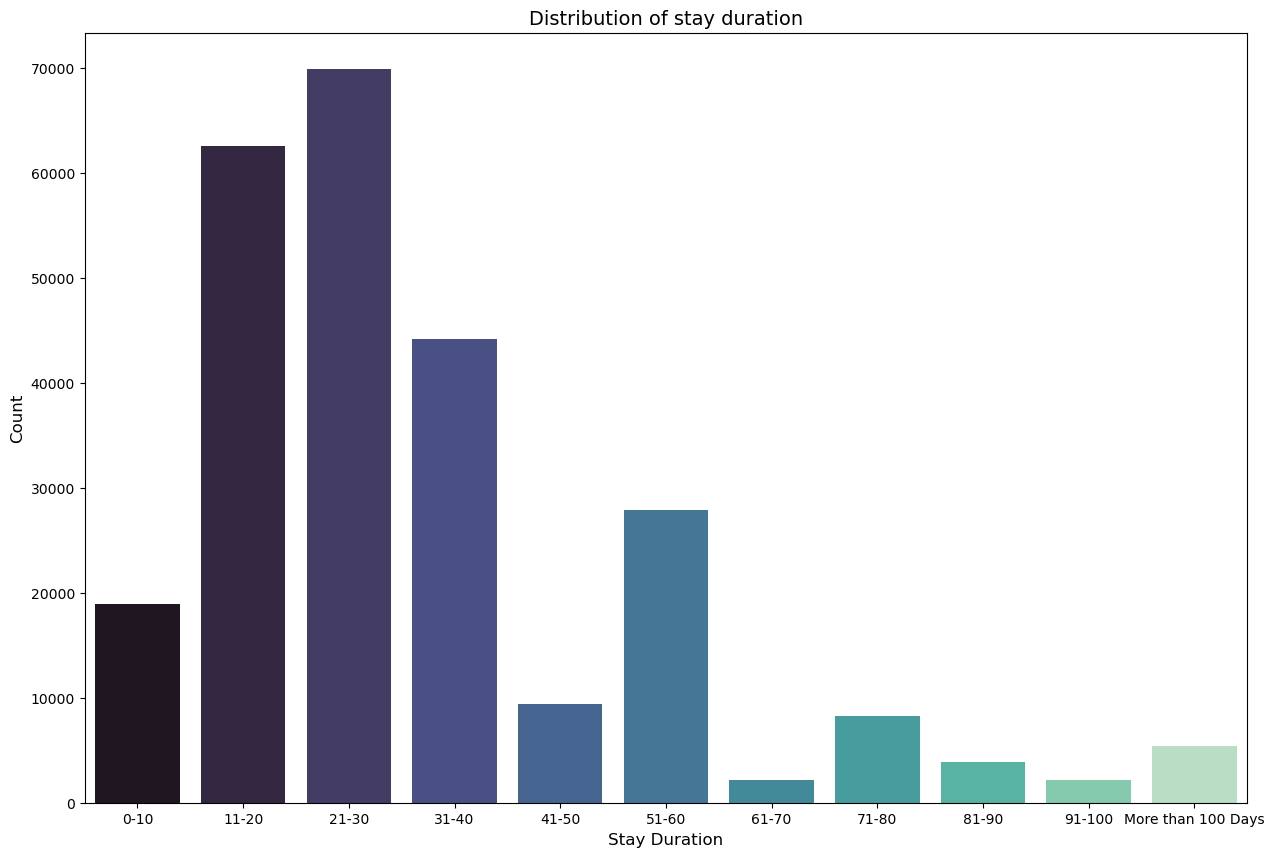

In [13]:
# Set the figure size
plt.figure(figsize=(15, 10)) 

# Create the count plot
sns.countplot(x=y_train.sort_values(), data=x_train, palette='mako') 

# Set the axis labels
plt.xlabel('Stay Duration', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Set the title
plt.title('Distribution of stay duration', fontsize=14)

# Show the plot
plt.show()

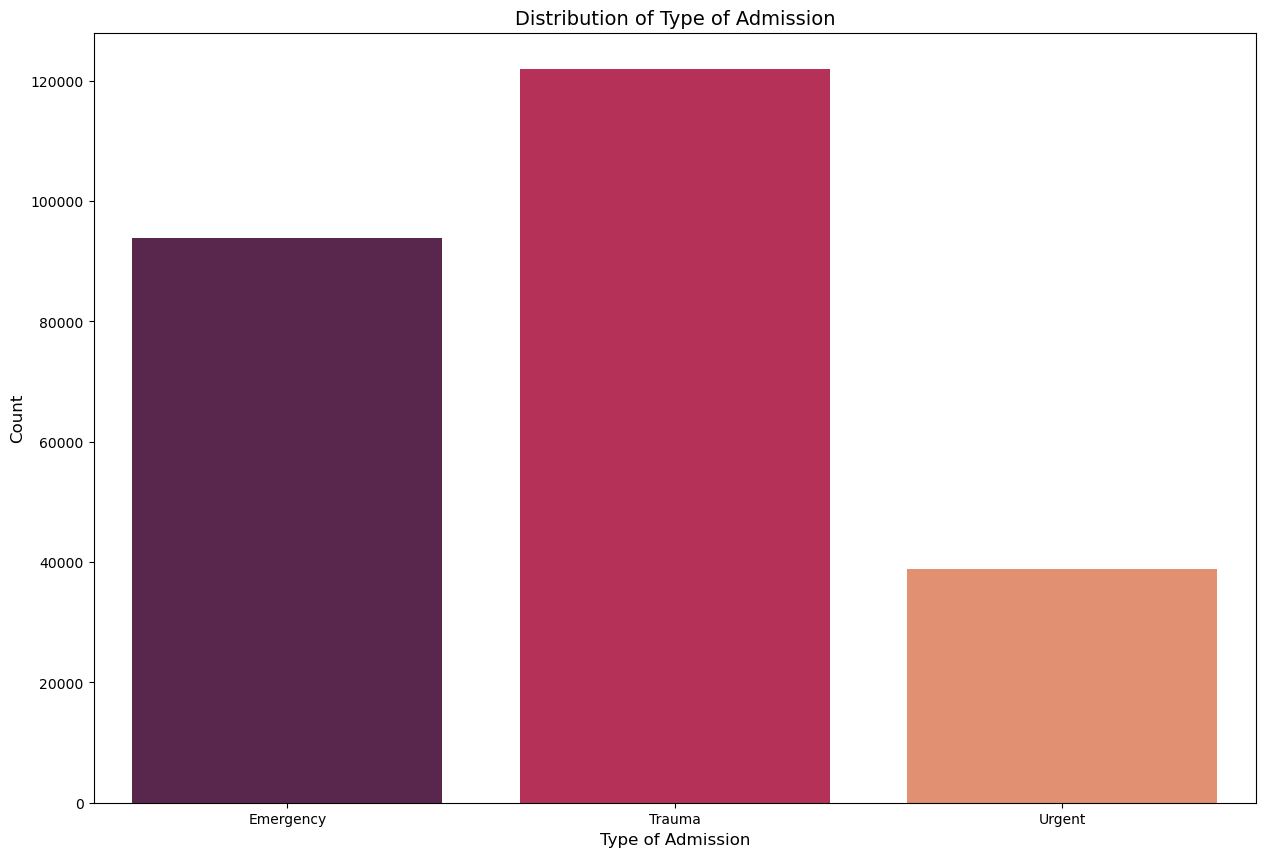

In [14]:
# Set the figure size
plt.figure(figsize=(15, 10)) 

# Create the count plot
sns.countplot(x=x_train['Type of Admission'].sort_values(), data=x_train, palette='rocket') 

# Set the axis labels
plt.xlabel('Type of Admission', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Set the title
plt.title('Distribution of Type of Admission', fontsize=14)

# Show the plot
plt.show()

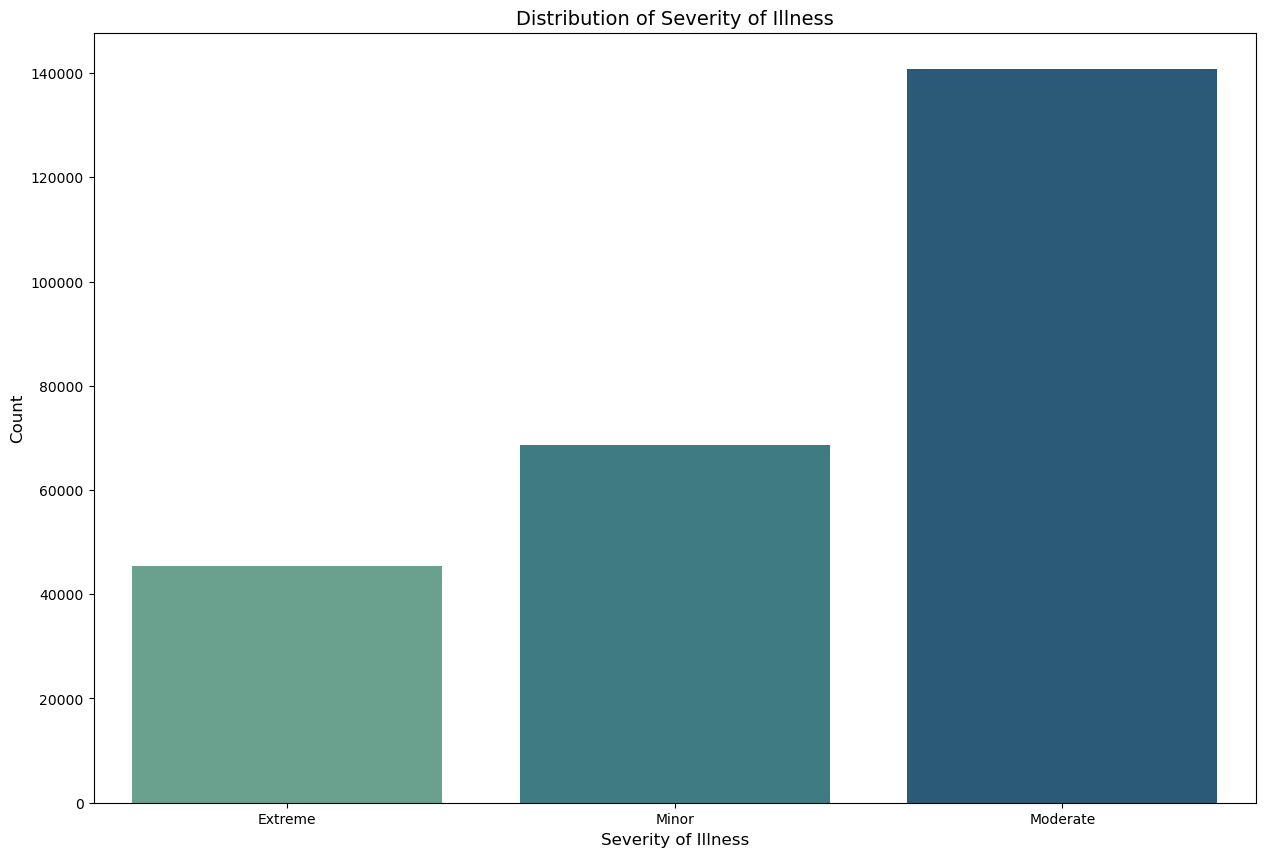

In [15]:
# Set the figure size
plt.figure(figsize=(15, 10)) 

# Create the count plot
sns.countplot(x=x_train['Severity of Illness'].sort_values(), data=x_train, palette='crest') 

# Set the axis labels
plt.xlabel('Severity of Illness', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Set the title
plt.title('Distribution of Severity of Illness', fontsize=14)

# Show the plot
plt.show()

## Check correlation

This step prepares the data by combining training features and target, then uses Ordinal Encoding to convert categorical features into numerical representations. Finally, it computes and visualizes the correlation matrix to understand relationships between all variables.

* Feature Selection: Helps identify features that are highly correlated with the target variable, which are often important for prediction.

* Multicollinearity Detection: Reveals highly correlated independent variables, which can be problematic for some models (e.g., linear regression) and may warrant dropping one of the correlated features.

* Understanding Relationships: Provides a quick overview of how features relate to each other and to the target.

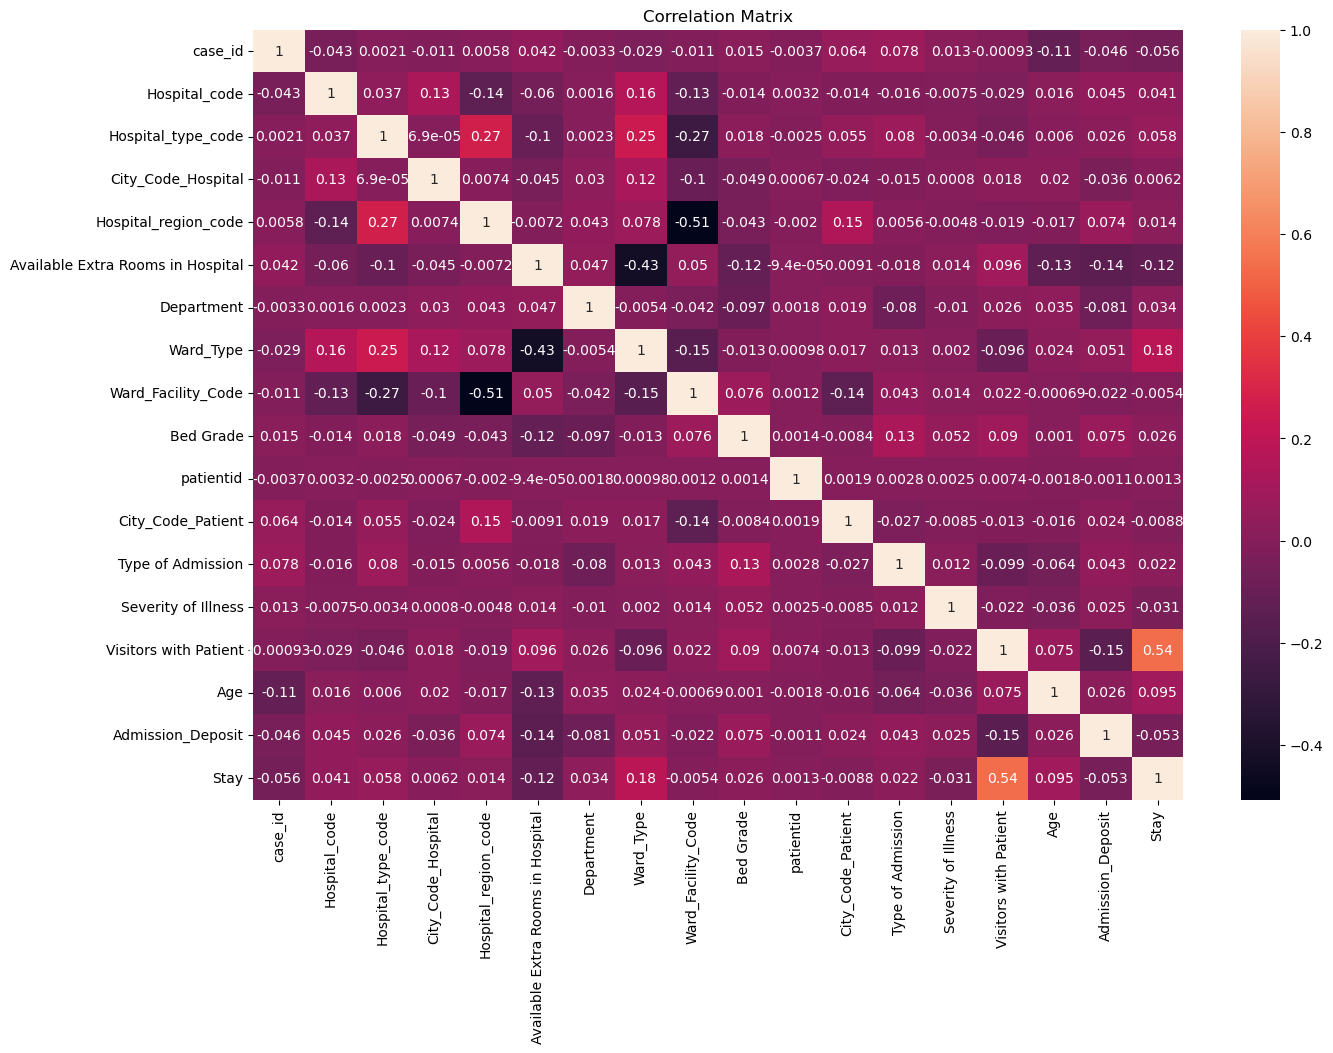

In [16]:
df_corr = pd.concat([x_train, y_train], axis=1) 

categorical_features  = ['Hospital_type_code','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code','Type of Admission',
                         'Severity of Illness','Age','Stay']
ordinal = OrdinalEncoder()
df_corr[categorical_features] = ordinal.fit_transform(df_corr[categorical_features])

correlation_matrix = df_corr.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True,cmap='rocket') 
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering

## Change data to appropriate form

This step converts the 'Age' column in both training and test feature sets, and the target 'Stay' in both training and test target sets, to string data type.

In [17]:
x_train['Age'] = x_train['Age'].astype(str)
y_train = y_train.astype(str)
x_test['Age'] = x_test['Age'].astype(str)
y_test = y_test.astype(str)

## Drop noise features

Irrelevant or noisy features such as `case_id, patientid, City_Code_Hospital, Ward_Facility_Code, and City_Code_Patient` are removed from both the training and test feature sets.

* Reduces Dimensionality: Simplifies the model and speeds up training.

* Prevents Overfitting: Removes features that might cause the model to learn irrelevant patterns.

* Improves Interpretability: Makes the model easier to understand by focusing on truly predictive features.

In [18]:
# Drop two columns: 'col2' and 'col4'
x_train = x_train.drop(['case_id', 'patientid','City_Code_Hospital','Ward_Facility_Code','City_Code_Patient'], axis=1) 
x_test = x_test.drop(['case_id', 'patientid','City_Code_Hospital','Ward_Facility_Code','City_Code_Patient'], axis=1) 

## Fill missing value, Scale Nummerical Columns, Encode Categorical Columns

This comprehensive preprocessing step uses pipelines to handle missing values (mean for numerical, mode for categorical), scale numerical features, and encode categorical features for both training and test datasets.

**sklearn.compose.ColumnTransformer:** This is a powerful tool for applying different transformers to different columns of an array or DataFrame. It allows for parallel processing of columns and ensures that the preprocessing steps are applied consistently.

**sklearn.pipeline.Pipeline:** Chains together multiple processing steps. This is beneficial for:

* Readability and Organization: Keeps the code clean and easy to follow.

* Ensuring Correct Order: Guarantees that steps are executed in the correct sequence (e.g., impute before scaling).

* Preventing Data Leakage: Crucially, by fitting transformers only on the training data and then applying them to both training and test data, it prevents "data leakage" from the test set into the training process.

**Numerical Pipeline:**

**SimpleImputer(strategy='mean'):** Handles missing values in numerical columns by replacing them with the mean of the respective column.

* Why mean? It's a common strategy for numerical data, especially when the distribution is relatively symmetric and there aren't extreme outliers that would skew the mean.

**StandardScaler():** Transforms numerical features to have a mean of 0 and a standard deviation of 1 (Z-score normalization).

* Why Scale? Many machine learning algorithms (like Logistic Regression, SVMs, neural networks) are sensitive to the scale of input features. Scaling ensures that no single feature dominates the learning process due to its larger magnitude, leading to faster convergence and better performance.

**Categorical Pipeline:**

**`SimpleImputer(strategy='most_frequent')`:** Handles missing values in categorical columns by replacing them with the most frequent category (mode).

* Why most_frequent? This is a common and robust strategy for categorical missing values, as it replaces missing entries with the most common existing category.

**`OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)`:** Converts categorical (string) features into numerical integers.

* Why OrdinalEncoder? It's chosen here to convert the categorical string labels into numerical values. handle_unknown='use_encoded_value', unknown_value=-1 is important for handling categories present in the test set but not seen in the training set, assigning them a specific value (-1) instead of raising an error. This prevents the model from crashing on unseen categories during prediction.

In [19]:
categorical_features  = ['Hospital_type_code','Hospital_region_code','Department','Ward_Type','Type of Admission','Severity of Illness','Age']

numerical_features = ['Hospital_code','Available Extra Rooms in Hospital','Bed Grade','Visitors with Patient','Admission_Deposit']

def preprocess_data(X_train, X_test, numerical_features, categorical_features):
  """
  Preprocesses the training and test data.

  Args:
      X_train: Training data.
      X_test: Test data.
      numerical_features: List of numerical feature names.
      categorical_features: List of categorical feature names.

  Returns:
      Tuple: Transformed X_train and X_test.
  """

  # Define pipelines for numerical and categorical features
  numerical_pipeline = Pipeline([
      ('imputer', SimpleImputer(strategy='mean')),
      ('scaler', StandardScaler())
  ])

  categorical_pipeline = Pipeline([
      ('imputer', SimpleImputer(strategy='most_frequent')),
      ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
  ])

  # Create the main preprocessor
  preprocessor = ColumnTransformer([
      ('num', numerical_pipeline, numerical_features),
      ('cat', categorical_pipeline, categorical_features)
  ], remainder='passthrough')

  # Fit the preprocessor on the training data
  preprocessor.fit(X_train)

  # Transform both training and test data
  X_train_processed = preprocessor.transform(X_train)
  X_test_processed = preprocessor.transform(X_test)  # Use X_test here

  return X_train_processed, X_test_processed


# Preprocess the data (assuming x_train and X_test are your actual data)
x_train, x_test = preprocess_data(x_train, x_test, numerical_features, categorical_features)

## Oversampling using SMOTE

This step addresses class imbalance in the training target variable (y_train) by using Synthetic Minority Over-sampling Technique (SMOTE) to create synthetic samples of minority classes to make target label achieve equal distribution.

* **Class Imbalance:** Before SMOTE, the initial class distribution shows that some 'Stay' durations are much more frequent than others (e.g., '21-30' days is 27.43%, while '61-70' days is only 0.85%).

* **Why is it a problem?** In machine learning, if one class significantly outnumbers others, a model trained on such imbalanced data might become biased towards the majority class. It might perform well on the majority class but poorly on the minority classes, as it has insufficient examples to learn their patterns. This leads to a model that is not truly effective across all classes.

* **How SMOTE works:** It selects a minority class instance and then finds its k-nearest neighbors. It then creates new synthetic instances by taking the difference between the instance and its neighbors, multiplying this difference by a random number between 0 and 1, and adding it to the original instance. This creates new, but similar, samples in the feature space.

In [20]:
y_train_series = pd.Series(y_train)
print("\nClass Distribution After Undersampling:")
print(y_train_series.value_counts(normalize=True) * 100)


Class Distribution After Undersampling:
Stay
21-30                 27.433955
11-20                 24.564475
31-40                 17.341708
51-60                 10.947988
0-10                   7.424926
41-50                  3.684396
71-80                  3.227870
More than 100 Days     2.116585
81-90                  1.529735
91-100                 0.868695
61-70                  0.859666
Name: proportion, dtype: float64


In [21]:
# Initialize SMOTE
sm = SMOTE(random_state=42)

# Apply SMOTE to oversample the minority class
x_resampled, y_resampled = sm.fit_resample(x_train, y_train)
x_train = x_resampled
y_train = y_resampled

y_resampled_series = pd.Series(y_resampled)
print("\nClass Distribution After Undersampling:")
print(y_resampled_series.value_counts(normalize=True) * 100)


Class Distribution After Undersampling:
Stay
21-30                 9.090909
More than 100 Days    9.090909
11-20                 9.090909
61-70                 9.090909
51-60                 9.090909
31-40                 9.090909
0-10                  9.090909
71-80                 9.090909
41-50                 9.090909
91-100                9.090909
81-90                 9.090909
Name: proportion, dtype: float64


## Encode Target Label

The categorical 'Stay' duration labels in both the training and test target variables are converted into numerical integers using Label Encoding. The mapping of original labels to their encoded values is also displayed.

In [22]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the label encoder on y_train
y_train = le.fit_transform(y_train) 
y_test = le.transform(y_test) 

In [23]:
# Get the class labels
class_labels = le.classes_
print(class_labels)
# Print the class labels and their corresponding encoded values
for i, label in enumerate(class_labels):
    print(f"Class: {label}, Encoded Label: {i}")

['0-10' '11-20' '21-30' '31-40' '41-50' '51-60' '61-70' '71-80' '81-90'
 '91-100' 'More than 100 Days']
Class: 0-10, Encoded Label: 0
Class: 11-20, Encoded Label: 1
Class: 21-30, Encoded Label: 2
Class: 31-40, Encoded Label: 3
Class: 41-50, Encoded Label: 4
Class: 51-60, Encoded Label: 5
Class: 61-70, Encoded Label: 6
Class: 71-80, Encoded Label: 7
Class: 81-90, Encoded Label: 8
Class: 91-100, Encoded Label: 9
Class: More than 100 Days, Encoded Label: 10


# Modeling

# Logistics Regression

A Logistic Regression model is initialized with a high maximum iteration count, trained on the preprocessed training data, and its performance is evaluated using 5-fold cross-validation, reporting individual and average accuracy scores.

**sklearn.linear_model.LogisticRegression:** This is a linear model used for classification tasks. Despite its name, Logistic Regression is a classification algorithm, not a regression one. It works by modeling the probability that a given input belongs to a certain class. For multi-class classification (like predicting 'Stay' duration with multiple categories), it typically uses a "one-vs-rest" (OvR) or "multinomial" strategy.

* **`max_iter=5000`:** This parameter sets the maximum number of iterations for the solver to converge. If the solver doesn't converge within the default number of iterations (often 100), it can raise a warning or fail. Increasing max_iter gives the model more opportunities to find an optimal solution, especially with larger or more complex datasets.

**Cross-Validation:** It's a technique used to assess how well a model will generalize to an independent dataset. Instead of a single train-test split, the data is divided into cv (here, 5) "folds." The model is trained on cv-1 folds and tested on the remaining fold. This process is repeated cv times, with each fold serving as the test set once.

**Why Cross-Validation?**

* **More Robust Evaluation:** Provides a more reliable estimate of a model's performance compared to a single train-test split, as it reduces the variance of the performance estimate.

* **Better Generalization Assessment:** Helps ensure that the model is not overly sensitive to the particular split of data and can generalize well to unseen data.

In [24]:
# Logistic regression for classification
model = LogisticRegression(max_iter=5000)

# Fit the model on the training data
model.fit(x_train, y_train)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')  # Use 'accuracy' for classification

# Print the results
print(f"\tK-Fold Cross-Validation Accuracy:", cv_scores)
print('-'*100)
print(f'\tAverage K-Fold Cross-Validation Accuracy: {cv_scores.mean()}')
print('-'*100)

	K-Fold Cross-Validation Accuracy: [0.25399664 0.2564226  0.2594274  0.26030712 0.2607754 ]
----------------------------------------------------------------------------------------------------
	Average K-Fold Cross-Validation Accuracy: 0.25818583071987133
----------------------------------------------------------------------------------------------------


## Hyperparameter Tuning with Optuna

This section performs automated hyperparameter optimization for Logistic Regression using Optuna. It defines an objective function that trains and cross-validates the model with different hyperparameter combinations, then searches for the best set of parameters to maximize accuracy. Finally, it trains and evaluates the model with the best-found parameters.

**Hyperparameter Tuning:** Machine learning models have parameters that are learned from the data (e.g., coefficients in Logistic Regression) and hyperparameters that are set before training (e.g., `C, solver, penalty in Logistic Regression`). The choice of hyperparameters significantly impacts model performance. Hyperparameter tuning is the process of finding the optimal combination of these settings.

**optuna:** An open-source hyperparameter optimization framework. It automates the search for optimal hyperparameters using various sampling algorithms (like Tree-structured Parzen Estimator, TPE, used here). It's more efficient than traditional grid search or random search, especially for high-dimensional hyperparameter spaces.

* **`sampler=optuna.samplers.TPESampler(seed=42)`:** Specifies the Tree-structured Parzen Estimator (TPE) algorithm for sampling hyperparameters. TPE adaptively selects promising hyperparameter values based on past trial results, making it more efficient than random search. seed=42 ensures reproducibility of the sampling process.

* **Compatible Solver-Penalty Combinations:** Logistic Regression solvers have restrictions on which penalty types they can use. The code explicitly checks for these compatible combinations to avoid ValueError exceptions and guide Optuna towards valid parameter sets. For example, lbfgs doesn't support 'l1' or 'elasticnet' penalties. Invalid combinations are assigned a score of 0.0 so Optuna avoids them.

In [25]:
# Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameter search space
    solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs', 'saga'])
    
    # Define a static list of all possible penalty values
    all_penalty_options = ['l1', 'l2', 'elasticnet', None]
    penalty = trial.suggest_categorical('penalty', all_penalty_options)
    
    # Define compatible solver-penalty combinations
    compatible_combinations = {
        'liblinear': ['l1', 'l2'],
        'lbfgs': ['l2', 'none'],
        'saga': ['l1', 'l2', 'elasticnet', None]
    }
    
    # Check if the solver-penalty combination is valid
    if penalty not in compatible_combinations[solver]:
        return 0.0  # Return a low score for invalid combinations
    
    params = {
        'C': trial.suggest_float('C', 1e-3, 1e3, log=True),  # Inverse of regularization strength
        'solver': solver,
        'penalty': penalty,
        'tol': trial.suggest_float('tol', 1e-6, 1e-2, log=True),  # Tolerance for stopping criteria
        'max_iter': trial.suggest_int('max_iter', 1000, 10000),  # Maximum number of iterations
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),  # Class weight
        'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False]),  # Whether to fit an intercept
        'random_state': 42  # For reproducibility
    }
    
    # Only include l1_ratio if penalty is elasticnet
    if params['penalty'] == 'elasticnet':
        params['l1_ratio'] = trial.suggest_float('l1_ratio', 0, 1)
    
    try:
        # Initialize the LogisticRegression model with the sampled hyperparameters
        model = LogisticRegression(**params)
        
        # Evaluate the model using cross-validation
        cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
        return cv_scores.mean()  # Return the average cross-validation accuracy
    except ValueError as e:
        # Handle any other ValueError (e.g., convergence issues)
        print(f"Trial failed with parameters {params} due to: {e}")
        return 0.0  # Return a low score for failed trials

# Create an Optuna study to maximize the cross-validation accuracy
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=20)  # Run 100 trials for a thorough search

# Get the best trial
best_trial = study.best_trial

# Print the best hyperparameters and score
print("\tBest Hyperparameters:", best_trial.params)
print('-'*100)
print(f"\tBest Cross-Validation Accuracy: {best_trial.value}")
print('-'*100)

# Train the best model with the best hyperparameters
best_params = best_trial.params
best_model = LogisticRegression(
    C=best_params['C'],
    penalty=best_params['penalty'],
    solver=best_params['solver'],
    l1_ratio=best_params.get('l1_ratio', None),  # Only include if penalty='elasticnet'
    tol=best_params['tol'],
    max_iter=best_params['max_iter'],
    class_weight=best_params['class_weight'],
    fit_intercept=best_params['fit_intercept'],
    random_state=42
)

# Fit the best model on the training data
best_model.fit(x_train, y_train)

# Evaluate the best model using cross-validation (for confirmation)
cv_scores = cross_val_score(best_model, x_train, y_train, cv=3, scoring='accuracy')
print(f"\tK-Fold Cross-Validation Accuracy with Best Model:", cv_scores)
print('-'*100)
print(f'\tAverage K-Fold Cross-Validation Accuracy with Best Model: {cv_scores.mean()}')
print('-'*100)

[I 2025-10-28 13:39:02,427] A new study created in memory with name: no-name-71d3f88d-9ad9-4347-bdc6-55b7f142dc60
[I 2025-10-28 13:39:02,431] Trial 0 finished with value: 0.0 and parameters: {'solver': 'lbfgs', 'penalty': 'l1'}. Best is trial 0 with value: 0.0.
[I 2025-10-28 13:39:45,124] Trial 1 finished with value: 0.24314357733971753 and parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.012329623163659839, 'tol': 5.415244119402541e-06, 'max_iter': 3738, 'class_weight': None, 'fit_intercept': False}. Best is trial 1 with value: 0.24314357733971753.
[I 2025-10-28 13:40:32,391] Trial 2 finished with value: 0.24729697796009917 and parameters: {'solver': 'saga', 'penalty': 'l2', 'C': 3.584985580340474, 'tol': 1.5339162591163623e-06, 'max_iter': 6468, 'class_weight': None, 'fit_intercept': False}. Best is trial 2 with value: 0.24729697796009917.
[I 2025-10-28 13:40:58,533] Trial 3 finished with value: 0.24372112554015132 and parameters: {'solver': 'liblinear', 'penalty': 'l1', '

	Best Hyperparameters: {'solver': 'saga', 'penalty': 'l2', 'C': 19.031311745086942, 'tol': 0.0011044350847124699, 'max_iter': 6052, 'class_weight': None, 'fit_intercept': True}
----------------------------------------------------------------------------------------------------
	Best Cross-Validation Accuracy: 0.25819233459878455
----------------------------------------------------------------------------------------------------
	K-Fold Cross-Validation Accuracy with Best Model: [0.25461257 0.25890516 0.26107876]
----------------------------------------------------------------------------------------------------
	Average K-Fold Cross-Validation Accuracy with Best Model: 0.2581988324175824
----------------------------------------------------------------------------------------------------


# Model Evaluation

This final step evaluates the performance of the trained and optimized Logistic Regression model on the unseen test data using various classification metrics (accuracy, precision, recall, F1-score, AUC-ROC), displays a detailed classification report, and visualizes the confusion matrix.

In [26]:
# Make predictions on the test data
y_pred = best_model.predict(x_test)

# Calculate metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # Or 'micro', 'weighted', None
recall = recall_score(y_test, y_pred, average='macro')  # Or 'micro', 'weighted', None
f1 = f1_score(y_test, y_pred, average='macro')  # Or 'micro', 'weighted', None

# Calculate predicted probabilities (assuming you have a multiclass model)
y_pred_proba = best_model.predict_proba(x_test)
# Choose between OVO or OVR (based on your preference)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovo')  # Or 'ovr'

# Print the results
#"Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"AUC-ROC: {roc_auc:.3f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.239
Precision: 0.205
Recall: 0.245
F1-score: 0.189
AUC-ROC: 0.734

Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.51      0.25      4689
           1       0.39      0.21      0.27     15561
           2       0.45      0.32      0.37     17603
           3       0.25      0.08      0.12     10981
           4       0.06      0.08      0.07      2357
           5       0.35      0.21      0.26      7128
           6       0.01      0.13      0.02       554
           7       0.11      0.08      0.10      2031
           8       0.11      0.33      0.16       941
           9       0.04      0.23      0.07       552
          10       0.32      0.50      0.39      1291

    accuracy                           0.24     63688
   macro avg       0.20      0.25      0.19     63688
weighted avg       0.33      0.24      0.26     63688



* **Accuracy: 0.239** means the model correctly predicted the 'Stay' duration for about 23.9% of the patients in the test set. For a multi-class problem with 11 classes, this is quite low, suggesting the model struggles to accurately pinpoint the exact duration.

* **Precision (Macro): 0.205** indicates that when the model predicts a certain 'Stay' duration, it's correct about 20.5% of the time on average across all classes.

* **Recall (Macro): 0.245** suggests that the model is able to identify about 24.5% of the actual instances of each 'Stay' duration on average.

* **F1-score (Macro): 0.189** reflects a generally low balance between precision and recall across classes, indicating poor overall performance.

* **AUC-ROC: 0.734** is a more promising score compared to accuracy, precision, recall, and F1-score. An AUC of 0.734 suggests that the model has a decent ability to rank positive instances higher than negative instances, even if its direct class predictions (which determine accuracy, precision, recall) are not highly precise. This implies that while the chosen decision threshold for classification might be poor, the underlying probabilistic scores from the model still carry some discriminative power.

The overall performance of the Logistic Regression model, even after hyperparameter tuning and handling class imbalance with SMOTE, appears to be relatively low, with an overall accuracy of 23.9%. The AUC-ROC score of 0.734 is the most promising metric, suggesting that the model does have some ability to rank probabilities correctly, but its direct classifications are not highly accurate. This indicates that a more complex model or further feature engineering might be necessary to improve the prediction of patient stay duration.


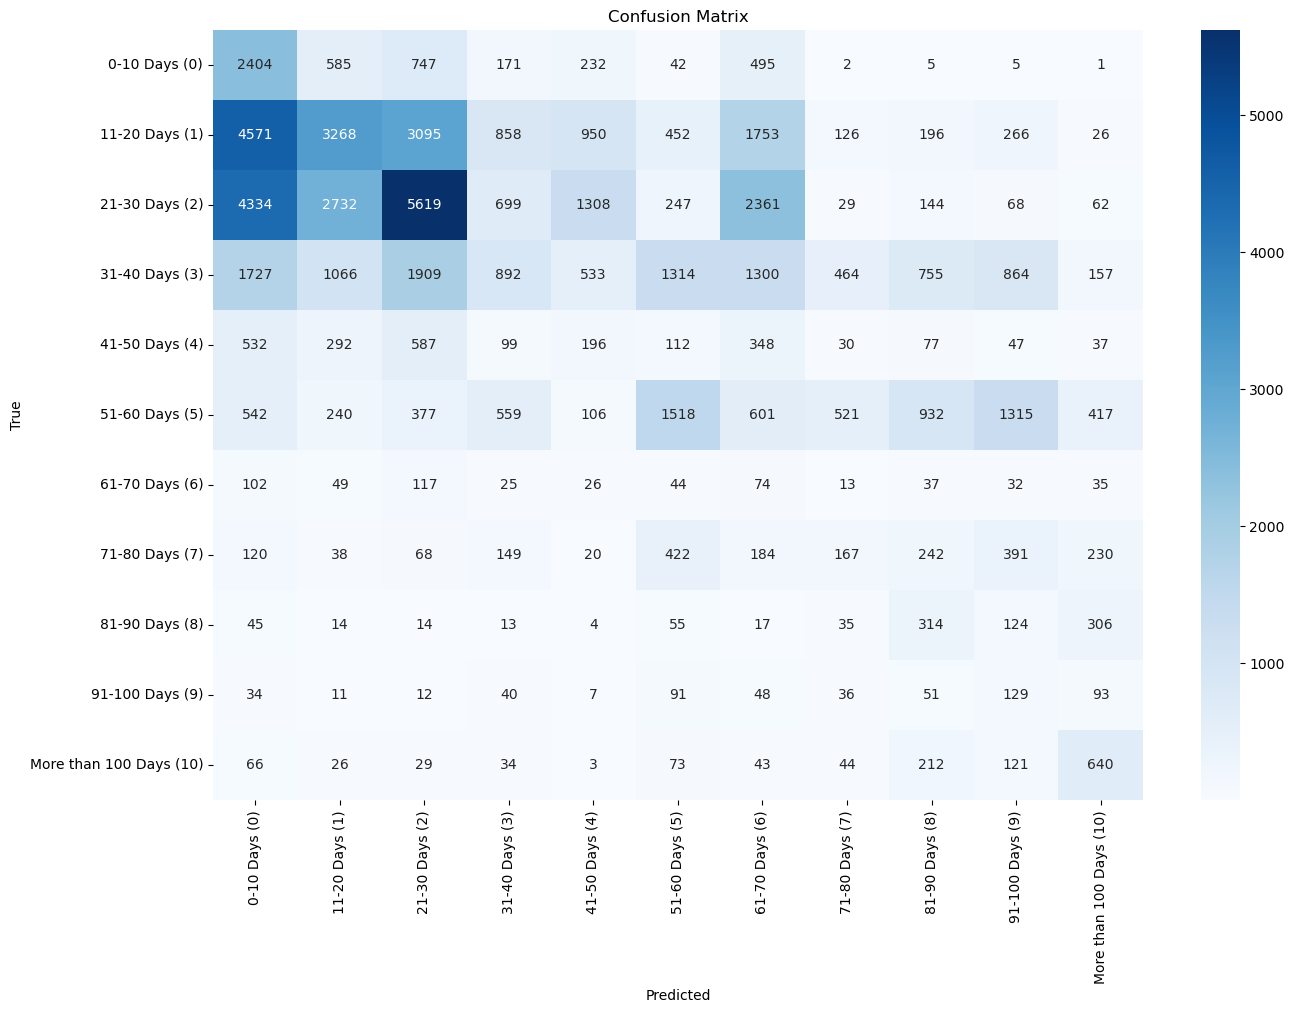

In [27]:
# Define class labels with corresponding encoded values
class_labels = [
    "0-10 Days (0)",
    "11-20 Days (1)",
    "21-30 Days (2)",
    "31-40 Days (3)",
    "41-50 Days (4)",
    "51-60 Days (5)",
    "61-70 Days (6)",
    "71-80 Days (7)",
    "81-90 Days (8)",
    "91-100 Days (9)",
    "More than 100 Days (10)"
]

# Visualize the confusion matrix with class labels
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Confusion Matrix Visualization:**

The heatmap visually represents the confusion_matrix. The rows represent the true labels, and the columns represent the predicted labels. The numbers in each cell indicate the count of instances.

A good model would have high values along the main diagonal (correct predictions) and low values elsewhere (misclassifications). The provided confusion matrix confirms the low overall accuracy, showing a significant number of misclassifications, particularly for minority classes or classes where the model struggles to differentiate effectively. For example, a high number in the cell where 'True' is '0-10' and 'Predicted' is '21-30' means many patients who stayed 0-10 days were incorrectly predicted to stay 21-30 days.

## Precision-Recall Curve

This code generates and plots Precision-Recall (PR) curves for each class in a multi-class classification problem using a "One-vs-Rest" (OvR) strategy. It shows the trade-off between precision and recall at various probability thresholds.

**Knowledge Behind the Step:**

* **Precision-Recall Curve:** This curve illustrates the trade-off between precision (the proportion of true positive predictions among all positive predictions) and recall (the proportion of actual positives that were correctly identified) as the classification threshold changes.

* **One-vs-Rest (OvR):** For multi-class problems, OvR creates a binary classification problem for each class, where that class is considered "positive" and all other classes are considered "negative." This allows for class-specific PR curves.

* **Why Do It:** PR curves are particularly insightful for imbalanced datasets where the minority class is of primary interest. A high area under the PR curve indicates good performance on the positive class, especially when false positives are costly. It provides a more nuanced view of performance than accuracy alone for specific classes

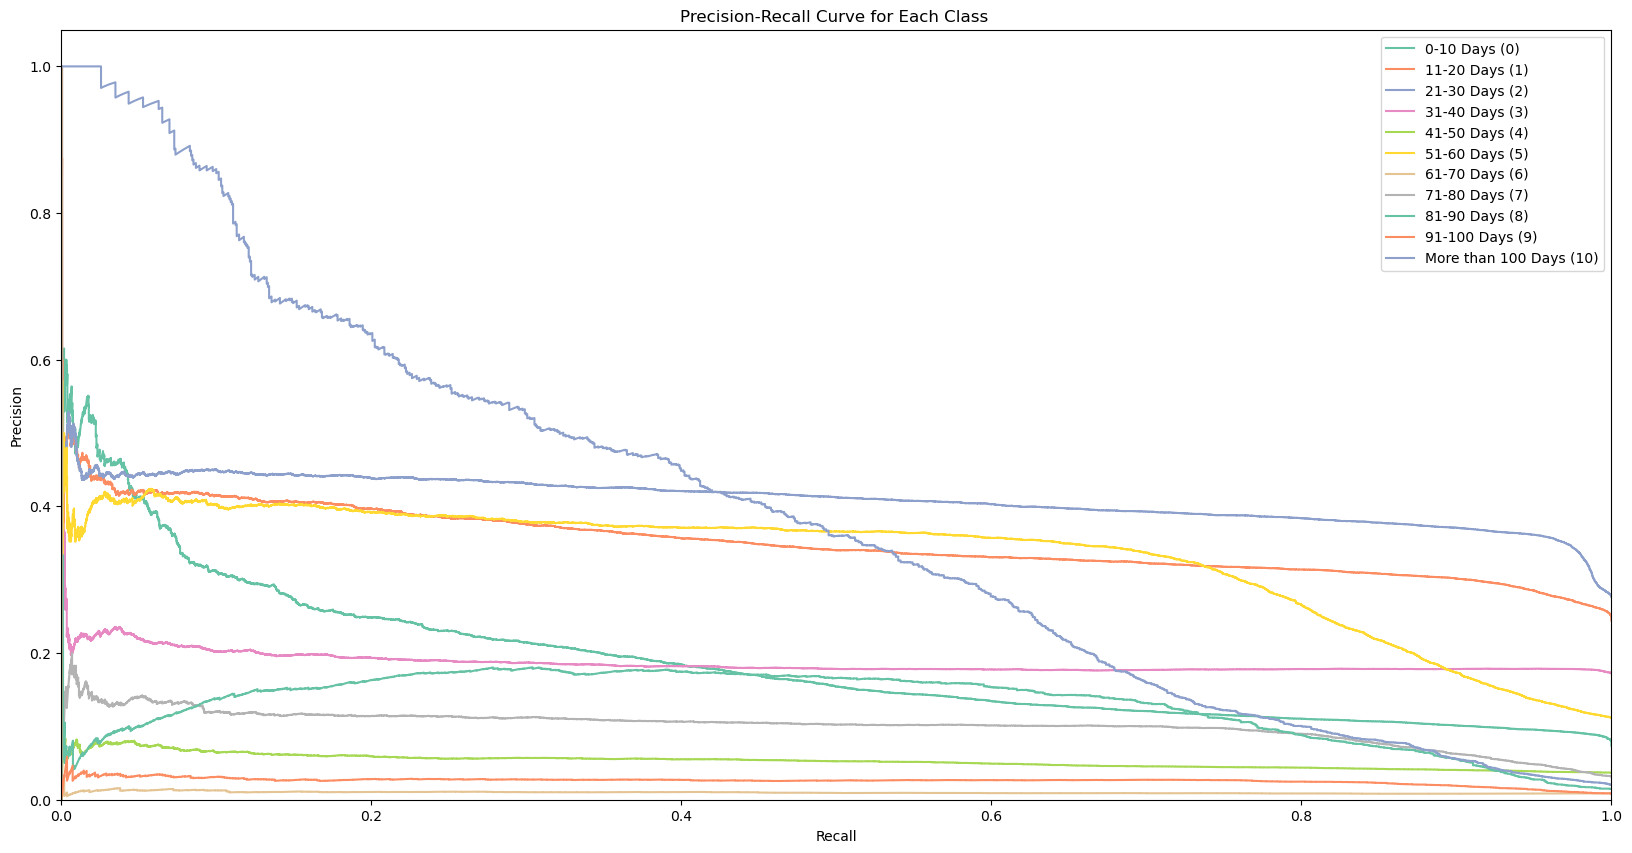

In [28]:
# Define class labels
class_labels = [
    "0-10 Days (0)",
    "11-20 Days (1)",
    "21-30 Days (2)",
    "31-40 Days (3)",
    "41-50 Days (4)",
    "51-60 Days (5)",
    "61-70 Days (6)",
    "71-80 Days (7)",
    "81-90 Days (8)",
    "91-100 Days (9)",
    "More than 100 Days (10)"
]


# Convert true labels to 1D 
y_test_labels = y_test.flatten()

# Initialize a plot
plt.figure(figsize=(20, 10))

# Set Seaborn color palette
sns.set_palette("Set2")

# Generate Precision-Recall curve for each class (OvR)
for i, label in enumerate(class_labels):
  # Get the true binary labels for the current class (OvR)
  y_test_bin = np.where(y_test_labels == i, 1, 0)

  # Get the predicted probabilities for the current class
  y_pred_prob = best_model.predict_proba(x_test)[:, i] 

  # Compute Precision-Recall values (OvR)
  precision, recall, _ = precision_recall_curve(y_test_bin, y_pred_prob)

  # Plot the curve
  plt.plot(recall, precision, label=label)

# Add plot details
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Each Class ")
plt.legend(loc="upper right")
plt.ylim([0, 1.05])
plt.xlim([0, 1])

# Show the plot
plt.show()

## ROC-AUC Curve

ROC curves and AUC scores are robust to class imbalance and provide a comprehensive view of a classifier's discriminative power across all possible decision thresholds. A high AUC indicates that the model can effectively rank positive instances higher than negative ones.
 
* **ROC Curve:** Plots the True Positive Rate (TPR) (recall) against the False Positive Rate (FPR) at different probability thresholds. TPR is the proportion of actual positives correctly identified, while FPR is the proportion of actual negatives incorrectly identified as positive.

* **AUC-ROC:** The Area Under the ROC Curve summarizes the classifier's overall performance. An AUC of 1.0 is perfect, while 0.5 is random guessing.

* **label_binarize:** Converts multi-class labels into a binary (one-hot) format suitable for computing ROC curves for each class in a multi-class setting.


------------------------------------------------------------------------------------------------------------------------------------------------------
0-10 Days (0) AUC: 0.7238

------------------------------------------------------------------------------------------------------------------------------------------------------
11-20 Days (1) AUC: 0.6603

------------------------------------------------------------------------------------------------------------------------------------------------------
21-30 Days (2) AUC: 0.7005

------------------------------------------------------------------------------------------------------------------------------------------------------
31-40 Days (3) AUC: 0.5248

------------------------------------------------------------------------------------------------------------------------------------------------------
41-50 Days (4) AUC: 0.6033

---------------------------------------------------------------------------------------------------------

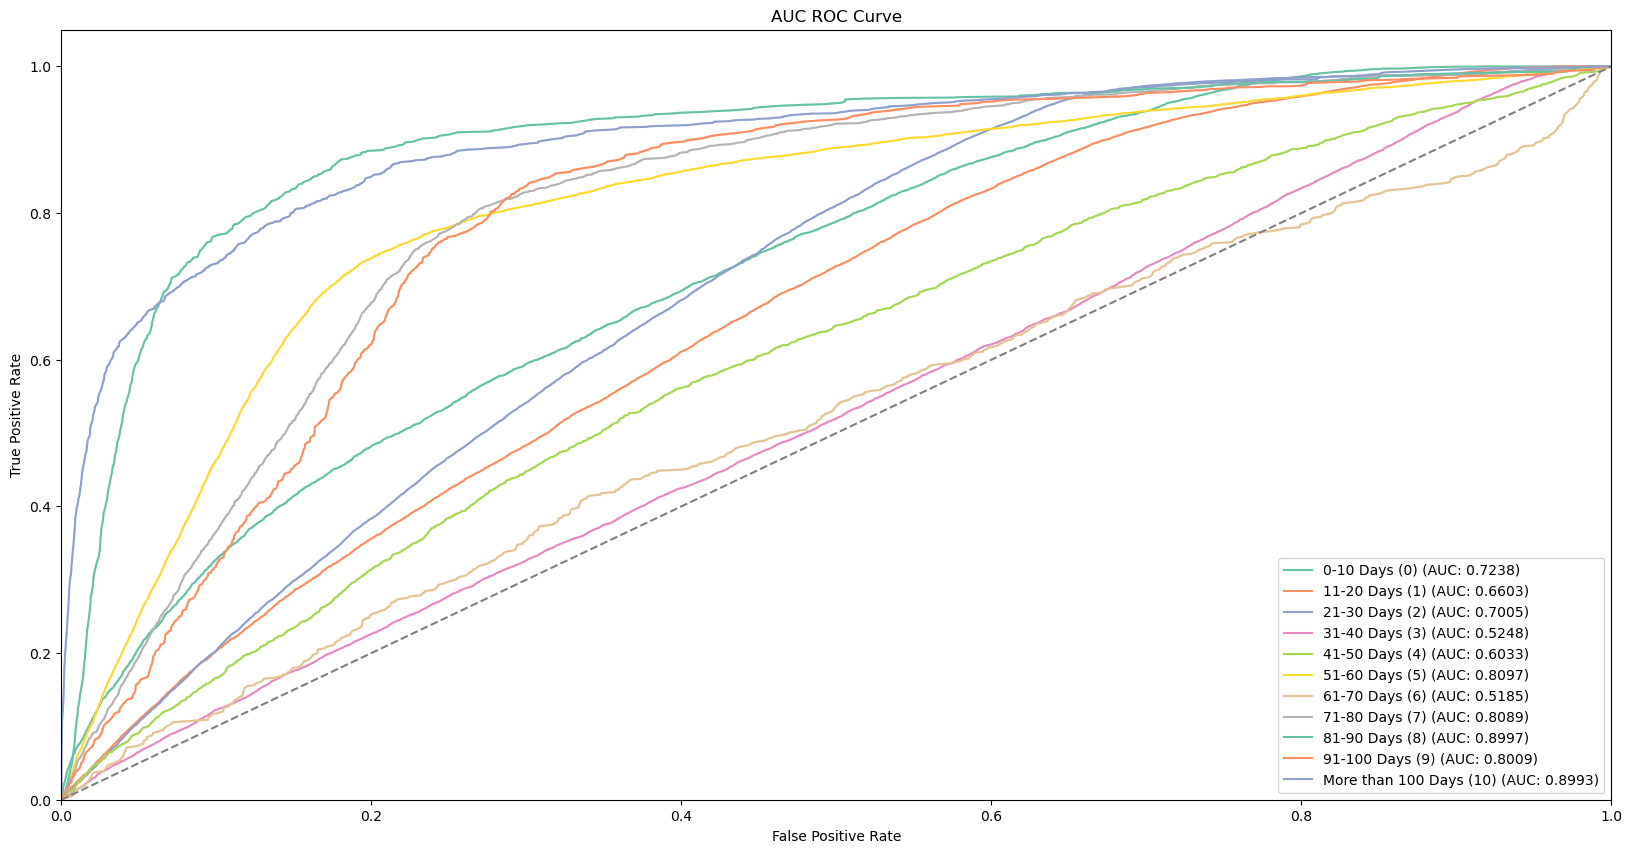

In [29]:
y_pred = best_model.predict_proba(x_test)

# Define class labels
class_labels = [
    "0-10 Days (0)",
    "11-20 Days (1)",
    "21-30 Days (2)",
    "31-40 Days (3)",
    "41-50 Days (4)",
    "51-60 Days (5)",
    "61-70 Days (6)",
    "71-80 Days (7)",
    "81-90 Days (8)",
    "91-100 Days (9)",
    "More than 100 Days (10)"
]
# Binarize the true labels for multi-class (one-vs-rest)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10])

# Initialize ROC curve and AUC dictionaries
fpr = dict()
tpr = dict()
roc_auc = dict()

# Loop over each class and calculate the ROC curve and AUC score
for i, class_label in enumerate(class_labels):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])  
    roc_auc[i] = auc(fpr[i], tpr[i])

# Create a new figure using Seaborn
plt.figure(figsize=(20, 10)) 

# Set Seaborn color palette"
sns.set_palette("Set2")

# Plot ROC curve for each class
for i, class_label in enumerate(class_labels):
    sns.lineplot(x=fpr[i], y=tpr[i], label=f'{class_label} (AUC: {roc_auc[i]:.4f})')

# Plot the random guessing line (optional)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC ROC Curve')
plt.legend(loc="lower right")

# Show AUC values for each class
for i, class_label in enumerate(class_labels):
    print()
    print('-'*150)
    print(f"{class_label} AUC: {roc_auc[i]:.4f}")
# Display the plot
print()
print('-'*150)
plt.show()

## Decision Boundary Visualization (2D)

Visualizing decision boundaries helps to intuitively understand how the model separates different classes. It can reveal if the model is too simple (underfitting) or too complex (overfitting) and how well it distinguishes between classes based on specific feature combinations.

**Decision Boundary:** For a classification model, the decision boundary is the line or surface that separates the different predicted classes in the feature space. For linear models like Logistic Regression, these boundaries are typically linear.

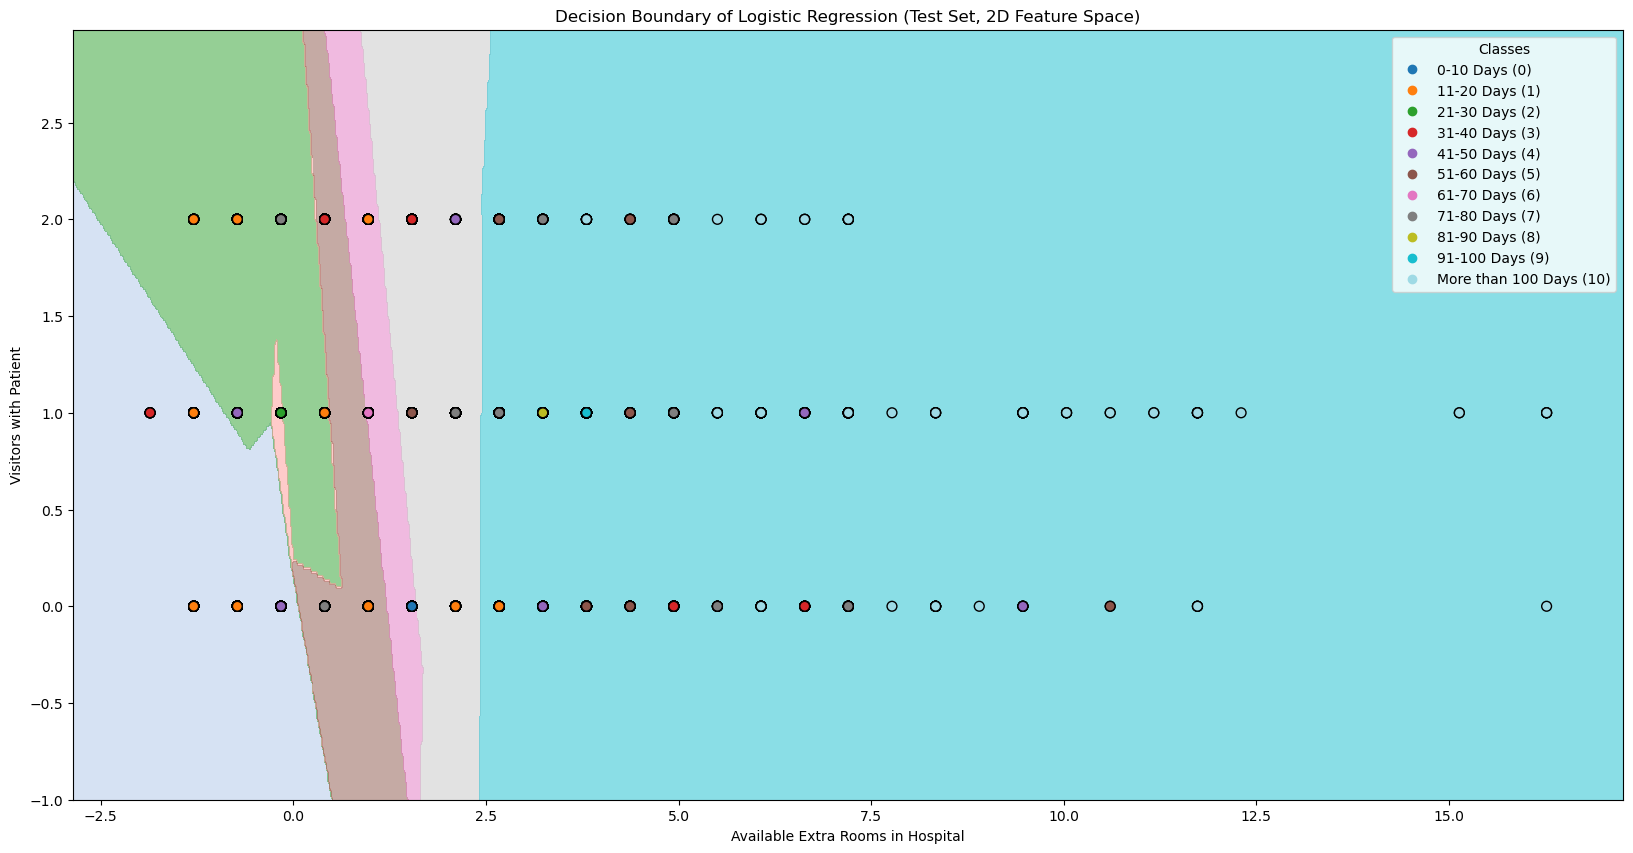

In [30]:
# Define class labels for the 11 classes
class_labels = [
    "0-10 Days (0)", "11-20 Days (1)", "21-30 Days (2)", "31-40 Days (3)",
    "41-50 Days (4)", "51-60 Days (5)", "61-70 Days (6)", "71-80 Days (7)",
    "81-90 Days (8)", "91-100 Days (9)", "More than 100 Days (10)"
]

# Ensure x_test is a DataFrame
if not isinstance(x_test, pd.DataFrame):
    columns = [
        'Hospital_code', 'Hospital_type_code', 
        'Hospital_region_code', 'Available Extra Rooms in Hospital', 'Department',
        'Ward_Type', 'Bed Grade',
        'Type of Admission', 'Severity of Illness',
        'Visitors with Patient', 'Age', 'Admission_Deposit'
    ]
    x_test = pd.DataFrame(x_test, columns=columns)

# Select two numerical features for visualization
feature1 = 'Available Extra Rooms in Hospital'
feature2 = 'Visitors with Patient'

# Extract the two features for visualization (test set)
X_test_2d = x_test[[feature1, feature2]]

# Create a mesh grid for plotting the decision boundary
h = 0.02  # Step size in the mesh
x_min, x_max = X_test_2d[feature1].min() - 1, X_test_2d[feature1].max() + 1
y_min, y_max = X_test_2d[feature2].min() - 1, X_test_2d[feature2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Prepare a synthetic dataset for the mesh grid by holding other features at their mean values
mean_values = x_test.mean()  # Use x_test to compute means since we're only plotting the test set
synthetic_data = np.tile(mean_values.values, (xx.ravel().shape[0], 1))  # Repeat mean values for each mesh point
synthetic_data = pd.DataFrame(synthetic_data, columns=x_test.columns)
synthetic_data[feature1] = xx.ravel()  # Set the first feature to the mesh grid values
synthetic_data[feature2] = yy.ravel()  # Set the second feature to the mesh grid values

# Predict the class for each point in the mesh grid using the best model
Z = best_model.predict(synthetic_data)
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the test data points
plt.figure(figsize=(20, 10))  # Adjusted size for better readability (original was 20, 10)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab20, alpha=0.5)  # Use tab20 for distinct colors for 11 classes

# Plot the test points
scatter = plt.scatter(X_test_2d[feature1], X_test_2d[feature2], c=y_test, cmap=plt.cm.tab20, edgecolors='k', s=50)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Boundary of Logistic Regression (Test Set, 2D Feature Space)')

# Add a legend for the classes
unique_labels = np.unique(y_test)
legend_labels = [class_labels[int(label)] for label in unique_labels]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Classes", loc="best")

plt.show()

## Sigmoid Curve Visualization (Binary Classification)

This visualization is crucial for understanding the core mechanism of Logistic Regression. It shows how changes in a single feature influence the predicted probability of an event, and how the model transitions from predicting one class to another. It helps in interpreting the model's probabilistic output.  This code visualizes the sigmoid probability curve for a Logistic Regression model. It simplifies the problem to a binary classification (e.g., '0-10 Days' vs. 'More than 100 Days') and plots the probability of the positive class against a single numerical feature, holding other features constant.

* **Sigmoid Function:** In Logistic Regression, the sigmoid (or logistic) function maps any real-valued number to a probability between 0 and 1. 

* **Probability Estimation:** Logistic Regression directly models the probability of an instance belonging to the positive class. The sigmoid curve shows how this probability changes as the value of a specific feature changes.

* **Binary Classification Subset:** For clear visualization of the sigmoid curve, the problem is simplified to a binary classification (e.g., picking two extreme 'Stay' durations). A new Logistic Regression model is trained on this subset to ensure the coefficients are specific to this binary problem.

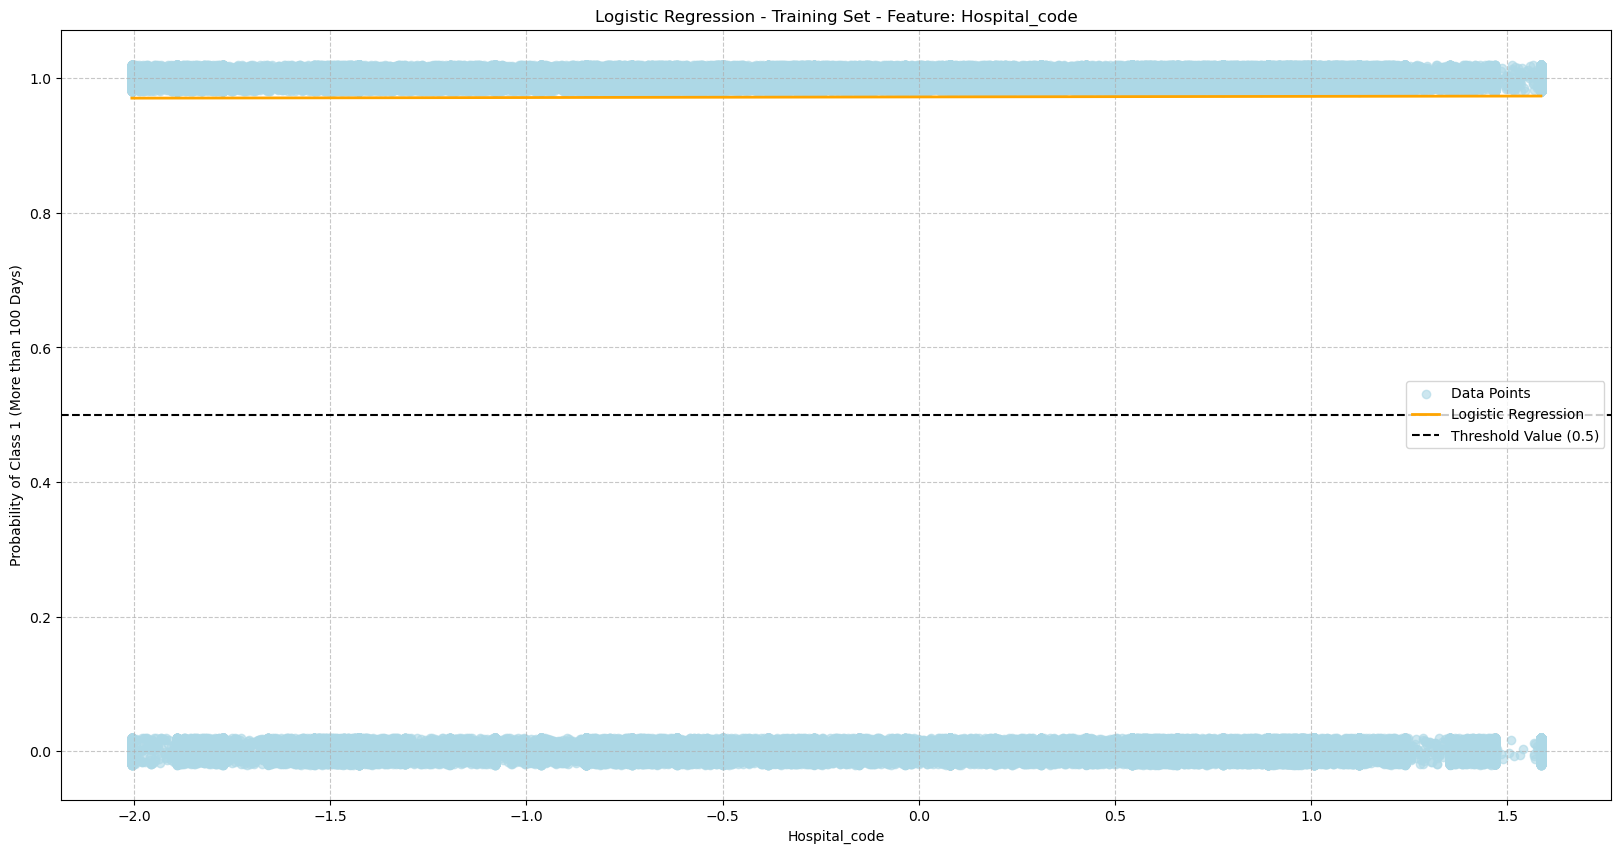

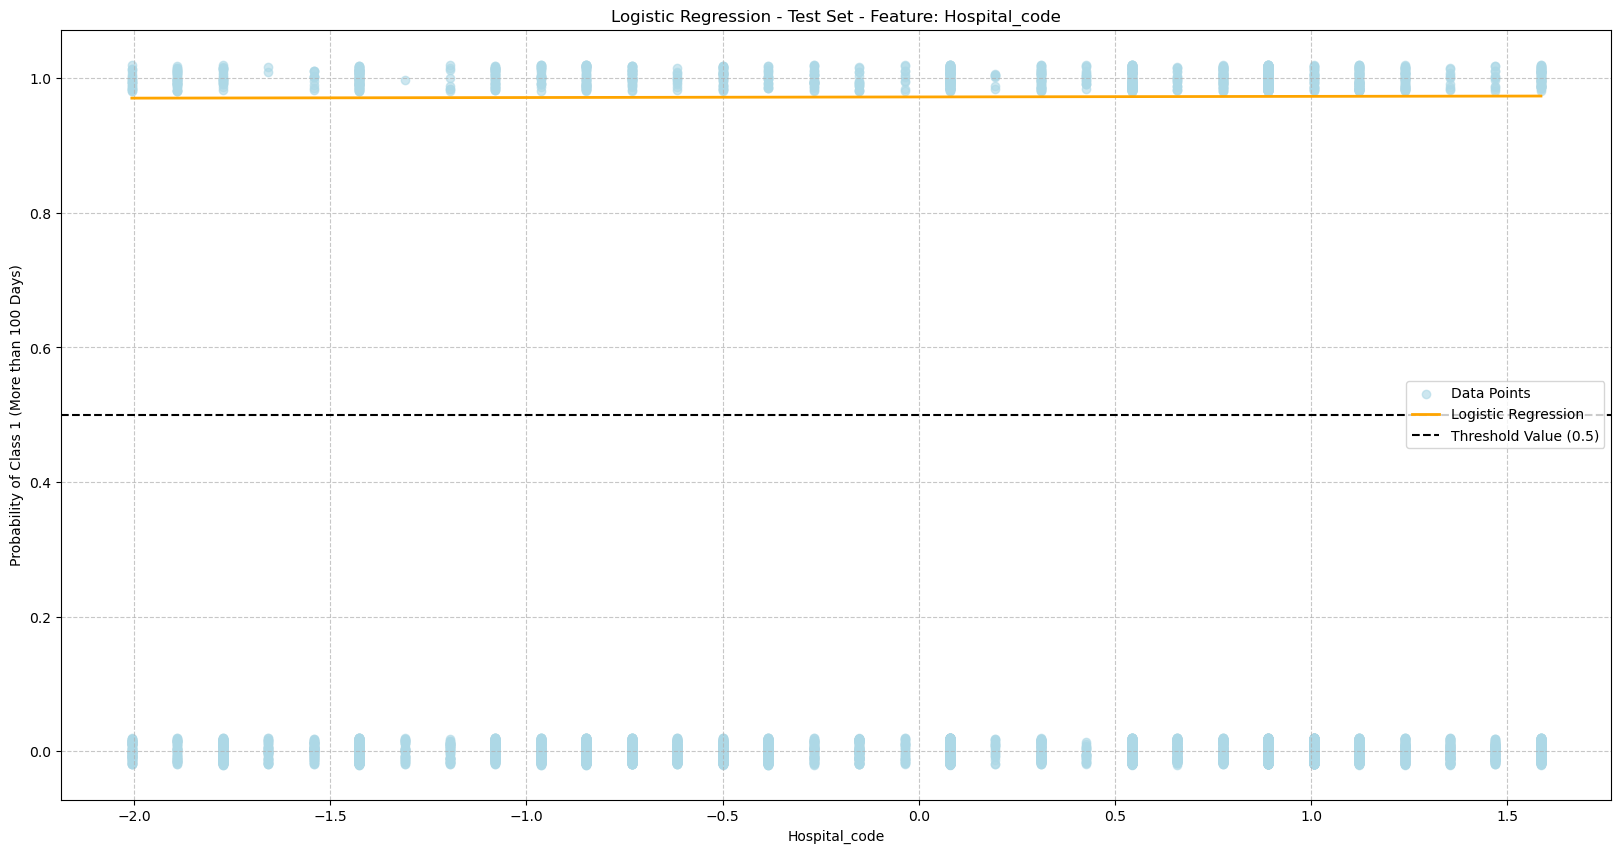

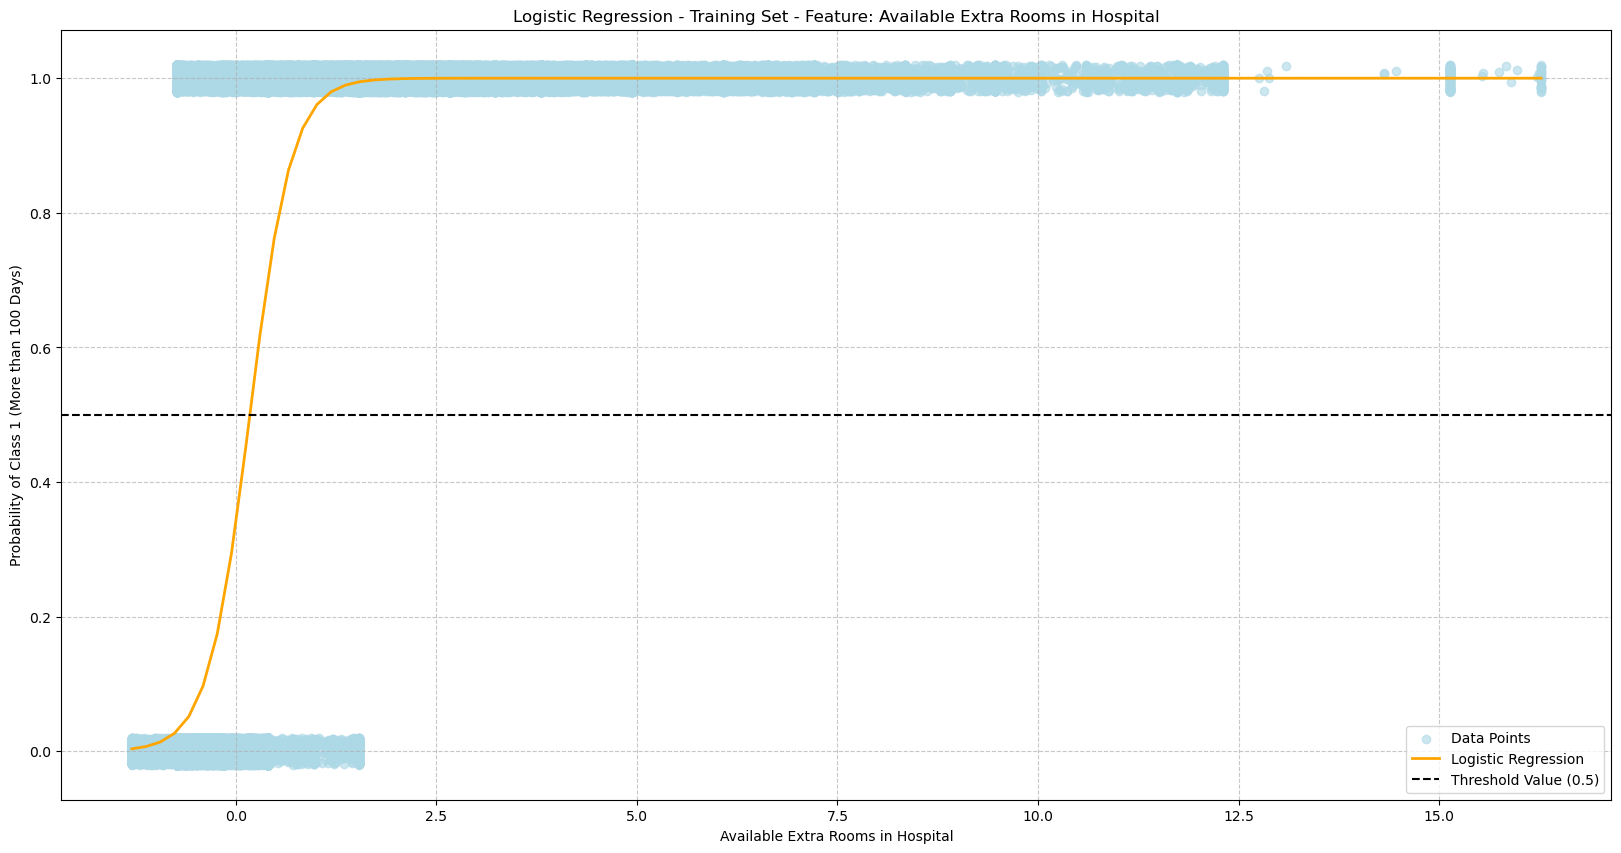

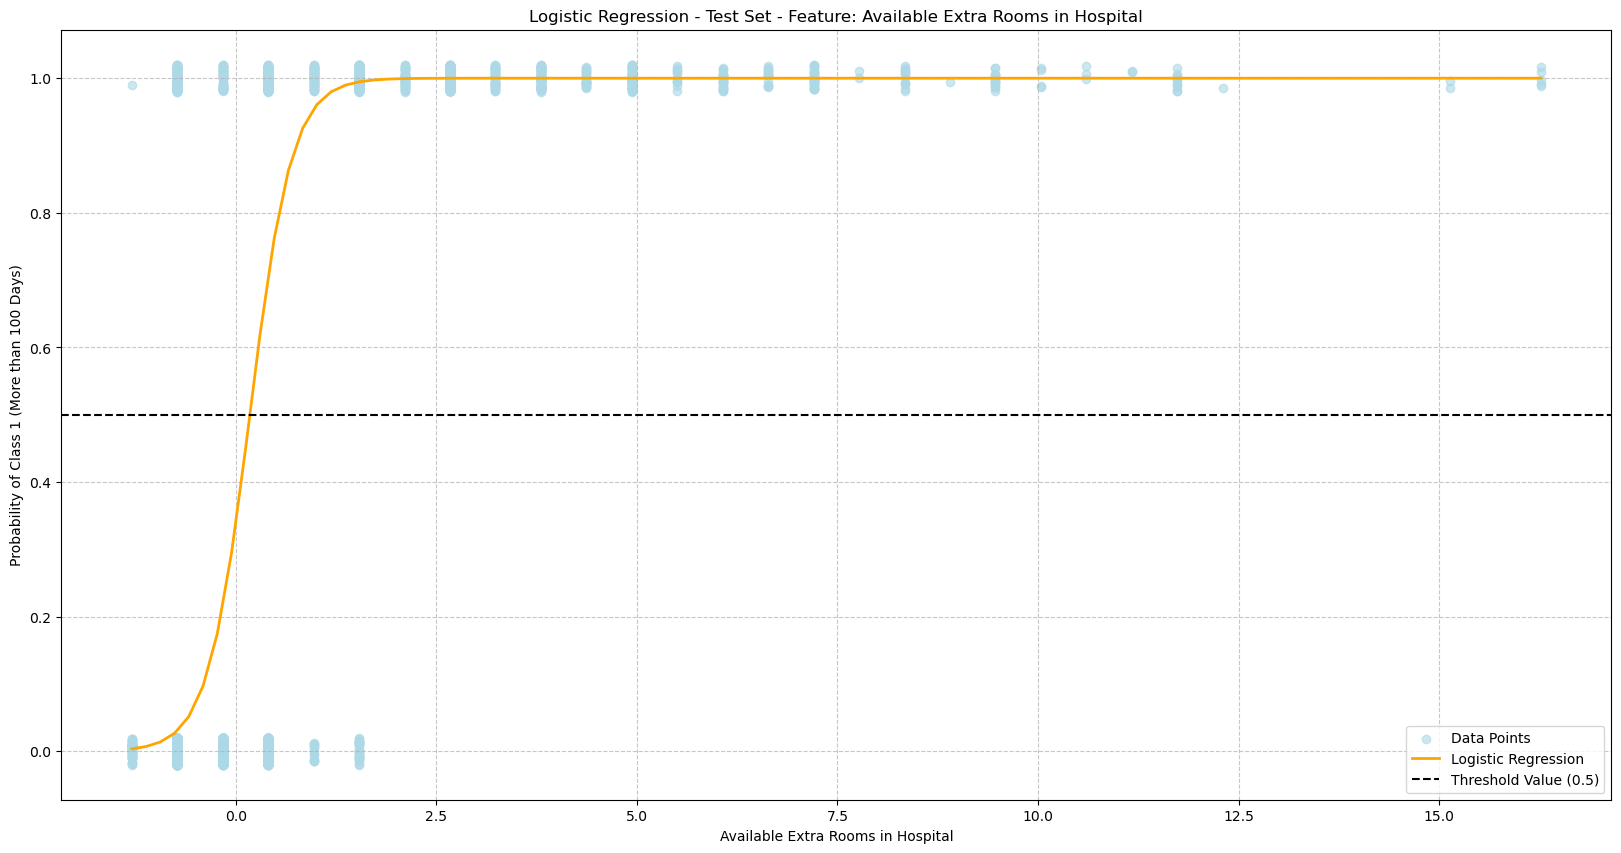

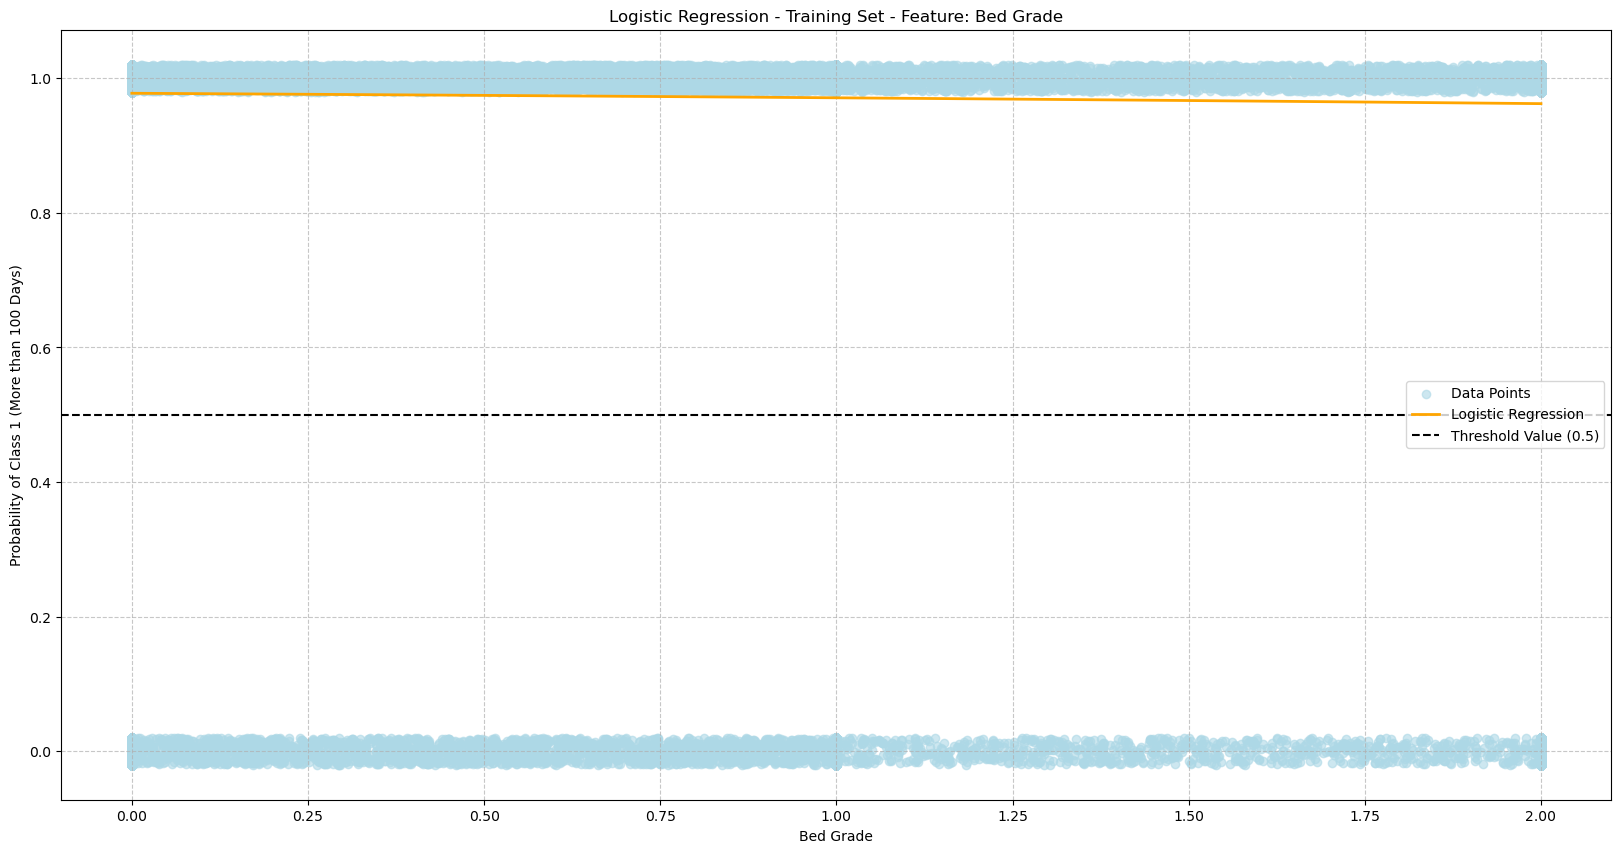

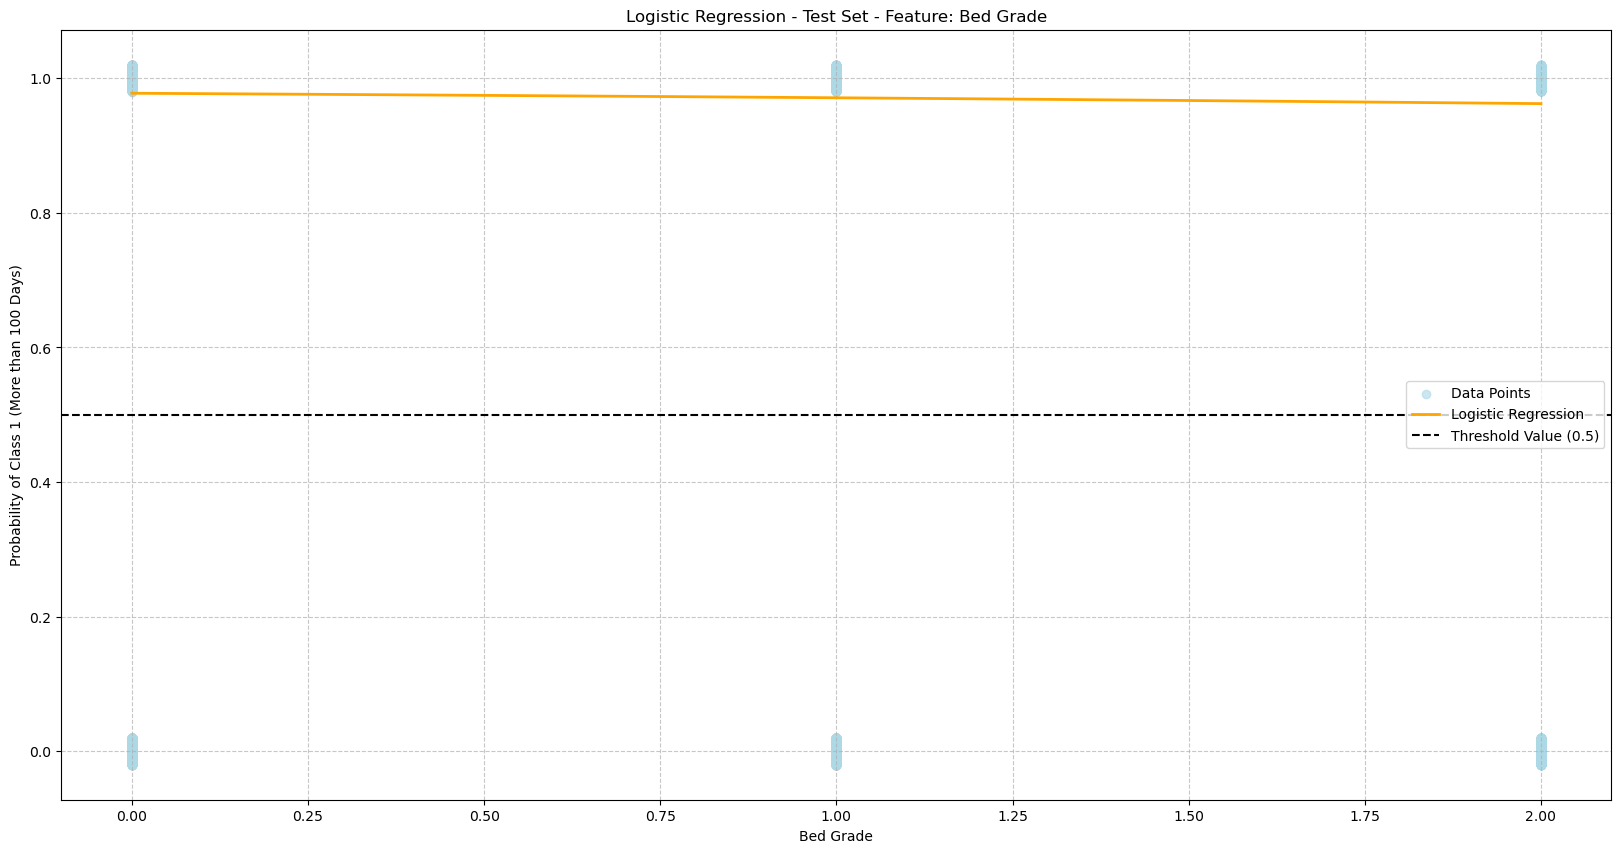

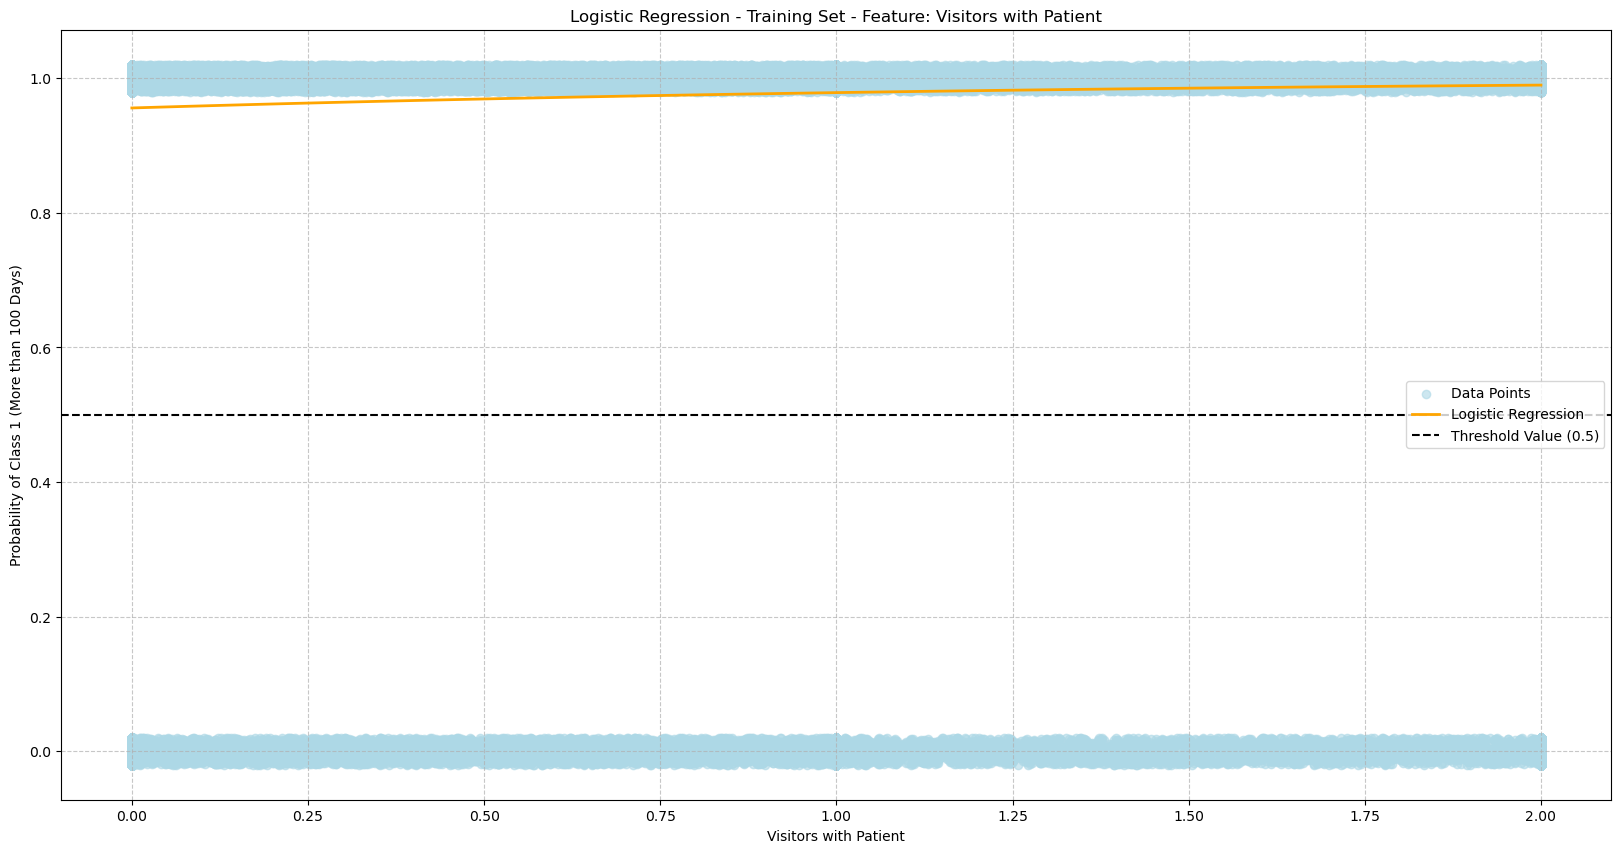

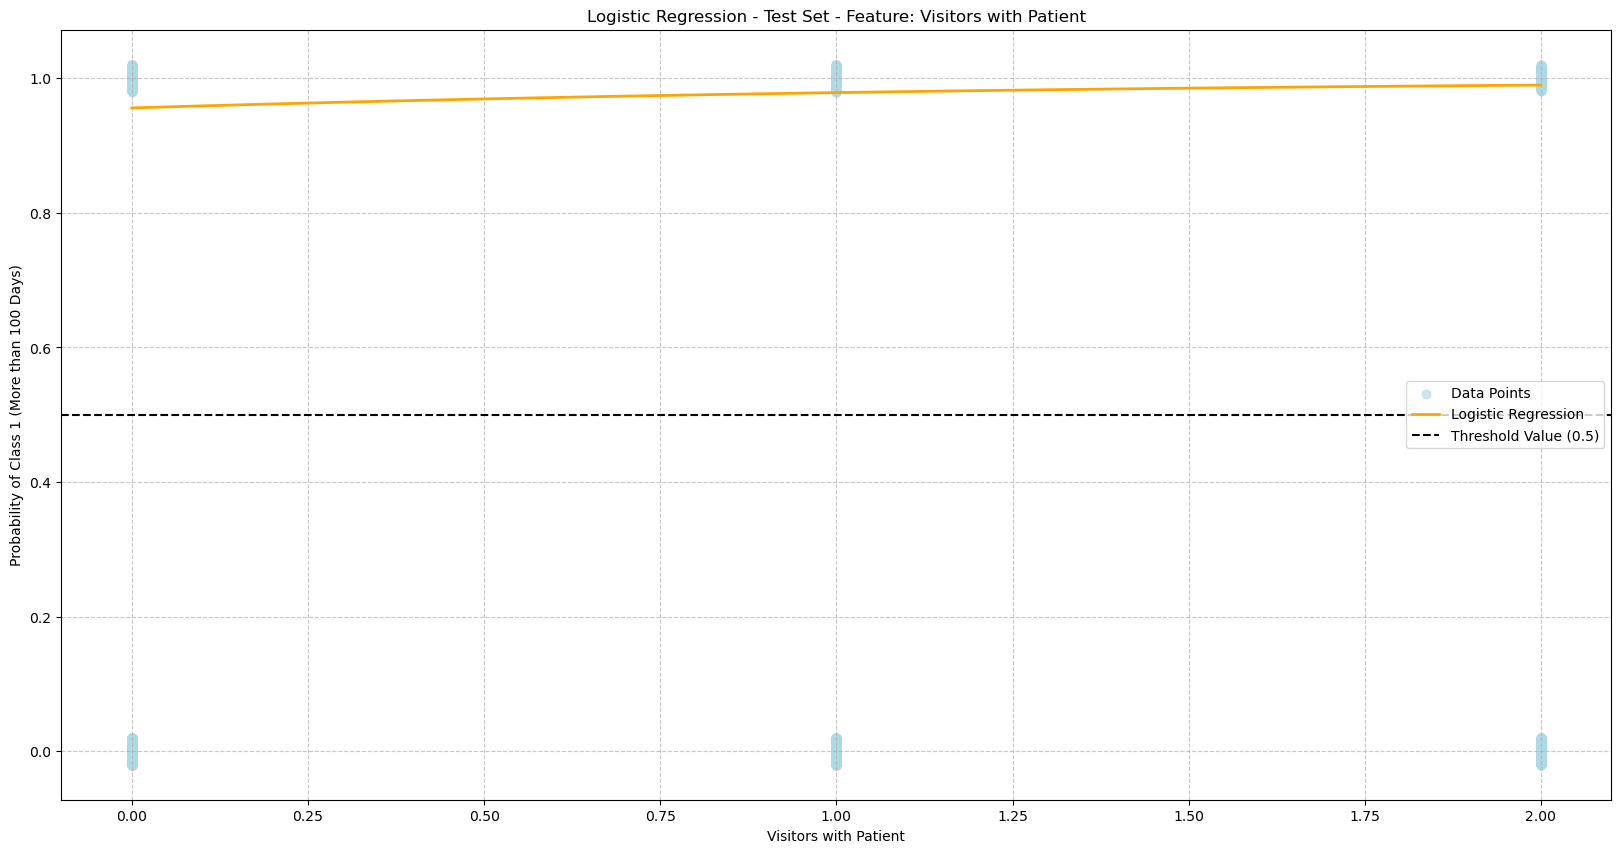

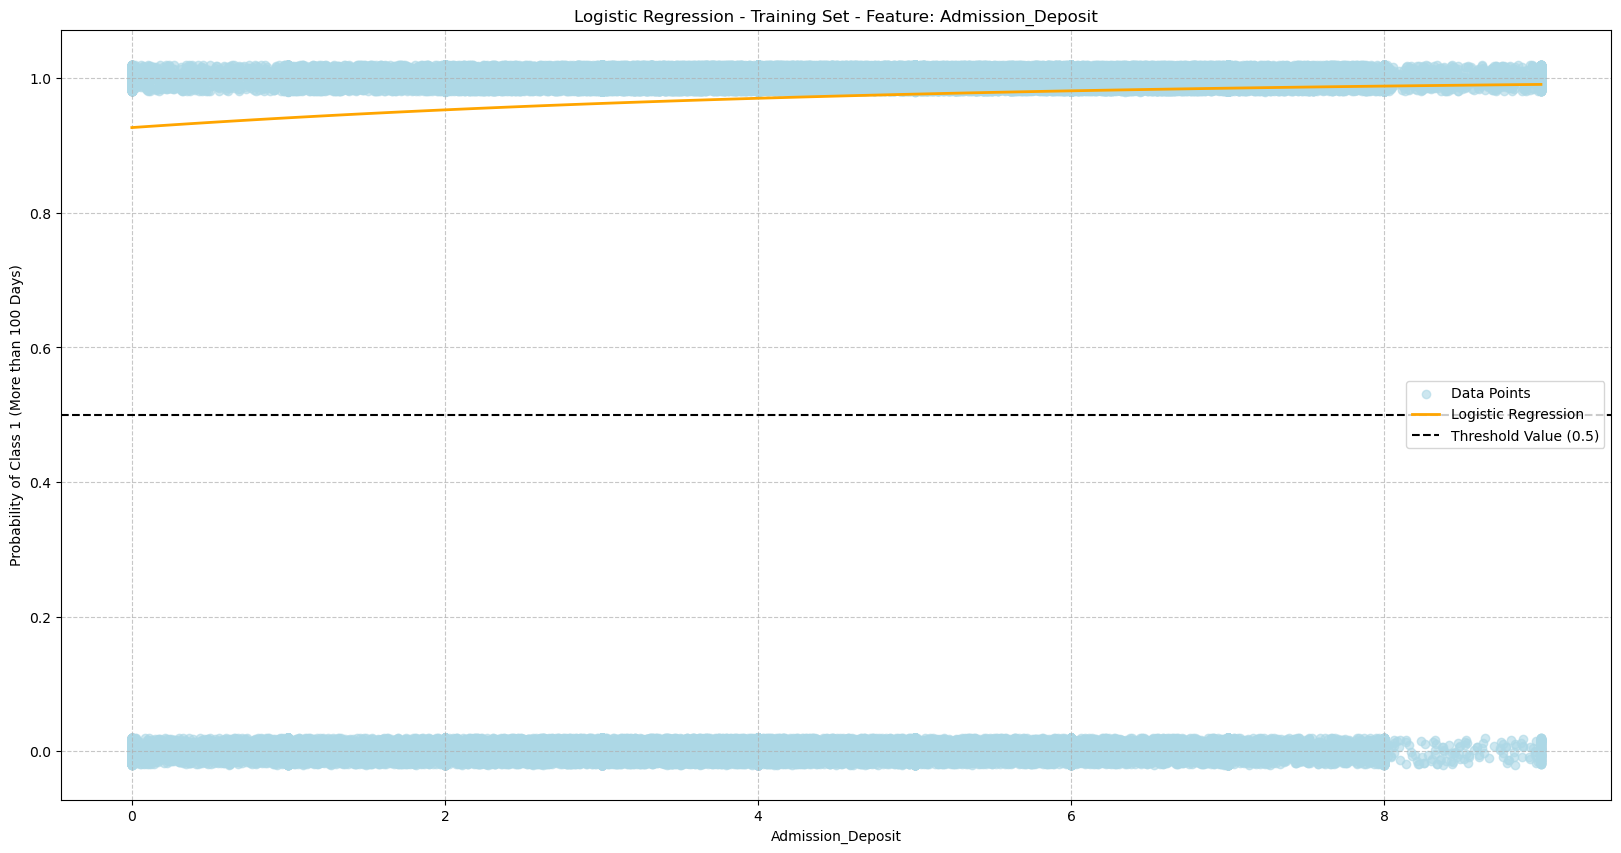

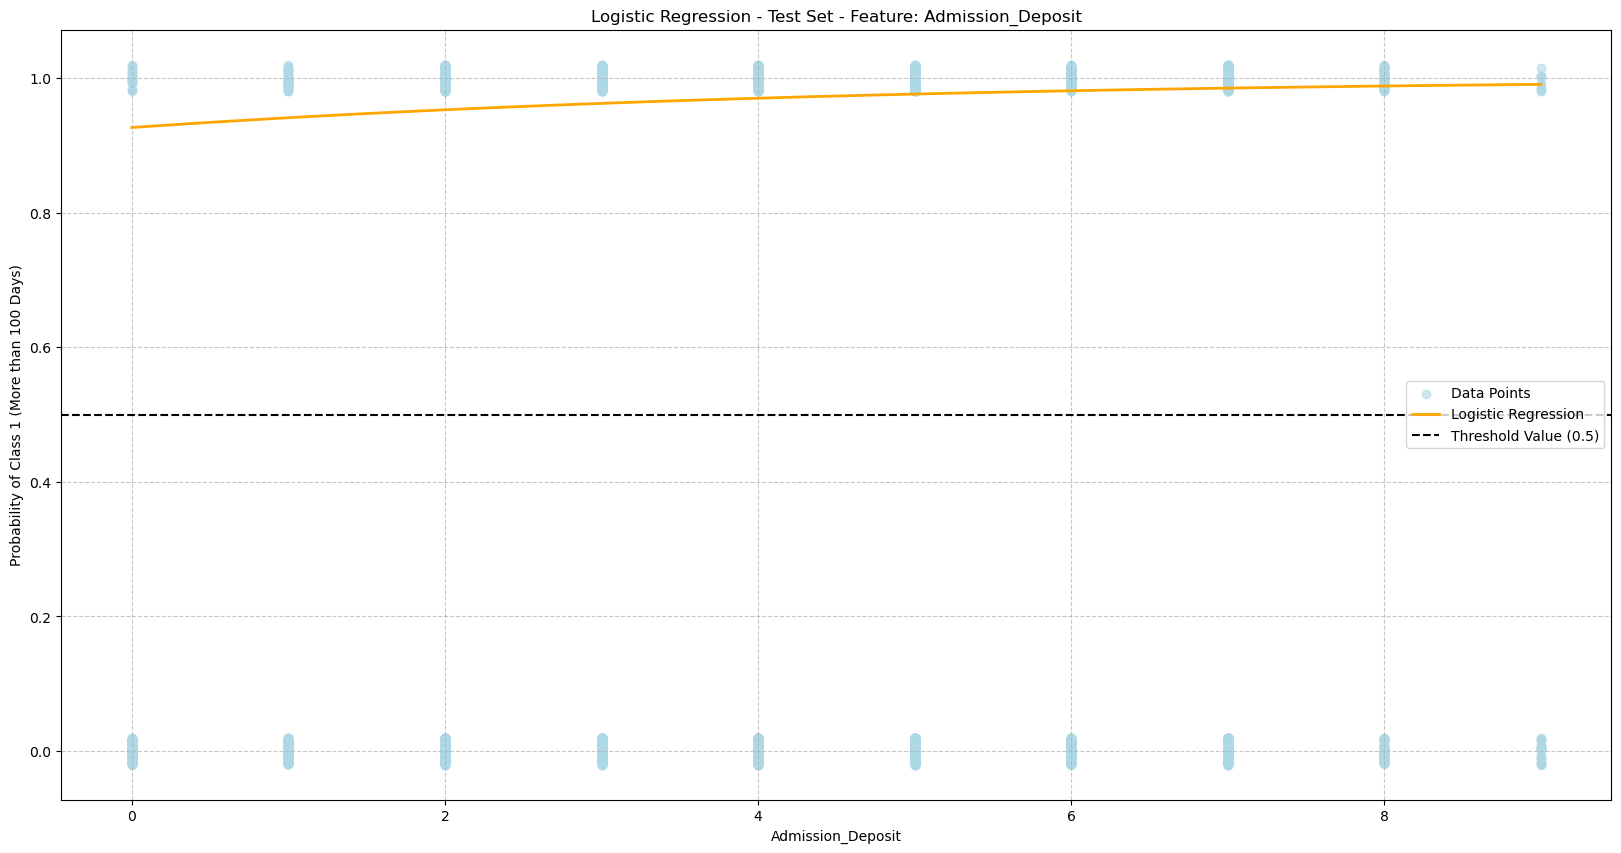

In [31]:
# Define class labels (as provided in previous code)
class_labels = [
    "0-10 Days (0)", "11-20 Days (1)", "21-30 Days (2)", "31-40 Days (3)",
    "41-50 Days (4)", "51-60 Days (5)", "61-70 Days (6)", "71-80 Days (7)",
    "81-90 Days (8)", "91-100 Days (9)", "More than 100 Days (10)"
]

# Ensure x_train and x_test are DataFrames
if not isinstance(x_train, pd.DataFrame):
    columns = [
        'Hospital_code', 'Hospital_type_code', 
        'Hospital_region_code', 'Available Extra Rooms in Hospital', 'Department',
        'Ward_Type', 'Bed Grade',
        'Type of Admission', 'Severity of Illness',
        'Visitors with Patient', 'Age', 'Admission_Deposit'
    ]
    x_train = pd.DataFrame(x_train, columns=columns)

if not isinstance(x_test, pd.DataFrame):
    columns = [
        'Hospital_code', 'Hospital_type_code', 
        'Hospital_region_code', 'Available Extra Rooms in Hospital', 'Department',
        'Ward_Type', 'Bed Grade',
        'Type of Admission', 'Severity of Illness',
        'Visitors with Patient', 'Age', 'Admission_Deposit'
    ]
    x_test = pd.DataFrame(x_test, columns=columns)

# Convert y_train and y_test to pandas Series if they are NumPy arrays
if not isinstance(y_train, pd.Series):
    y_train = pd.Series(y_train, name='Target')

if not isinstance(y_test, pd.Series):
    y_test = pd.Series(y_test, name='Target')

# --- Plot Sigmoid Curve for Logistic Regression (Binary Classification) ---

# Simplify to binary classification: select two classes (e.g., class 0 vs. class 10)
binary_classes = [0, 10]  # "0-10 Days" vs. "More than 100 Days"

# Filter training and test sets
mask_train = y_train.isin(binary_classes)
X_train_binary = x_train[mask_train]
y_train_binary = y_train[mask_train]

mask_test = y_test.isin(binary_classes)
X_test_binary = x_test[mask_test]
y_test_binary = y_test[mask_test]

# Check if both classes are present in the training set
unique_train_classes = np.unique(y_train_binary)
if len(unique_train_classes) < 2:
    print(f"Error: Training set contains only one class: {unique_train_classes}. Cannot perform binary classification.")
    print("Please select different classes or ensure both classes are present in the data.")
    exit()

# Check if test set is empty or contains only one class
unique_test_classes = np.unique(y_test_binary)
if len(X_test_binary) == 0:
    print("Error: Test set is empty after filtering for classes 0 and 10. Cannot plot sigmoid curve for test set.")
    exit()
if len(unique_test_classes) < 2:
    print(f"Warning: Test set contains only one class: {unique_test_classes}. Sigmoid curve may not be informative.")

# Map labels to 0 and 1 for binary classification
# Class 0 ("0-10 Days") -> 0, Class 10 ("More than 100 Days") -> 1
y_train_binary = (y_train_binary == 10).astype(int)
y_test_binary = (y_test_binary == 10).astype(int)

# Identify numerical features
numerical_features = [
    'Hospital_code', 'Available Extra Rooms in Hospital', 'Bed Grade',
    'Visitors with Patient', 'Admission_Deposit'
]

# Retrain best_model on the binary classification subset
# Create a new instance to avoid overwriting the multiclass model
model_binary = LogisticRegression(
    C=best_params['C'],
    penalty=best_params['penalty'],
    solver=best_params['solver'],
    l1_ratio=best_params.get('l1_ratio', None),
    tol=best_params['tol'],
    max_iter=best_params['max_iter'],
    class_weight=best_params['class_weight'],
    fit_intercept=best_params['fit_intercept'],
    random_state=42
)

# Function to plot the sigmoid curve for a given dataset and feature
def plot_sigmoid_curve(X, y_binary, feature, dataset_name):
    # Prepare a synthetic dataset for the feature by holding other features at their mean values
    mean_values = X_train_binary.mean()
    synthetic_data = np.tile(mean_values.values, (100, 1))  # 100 points for the sigmoid curve
    synthetic_data = pd.DataFrame(synthetic_data, columns=X_train_binary.columns)
    
    # Generate points for the sigmoid curve
    x_range = np.linspace(X[feature].min(), X[feature].max(), 100).reshape(-1, 1)
    synthetic_data[feature] = x_range.ravel()  # Set the feature to the range of values
    
    # Predict probabilities using the binary model
    probabilities = model_binary.predict_proba(synthetic_data)[:, 1]  # Probability of class 1

    # Plot the data points and the sigmoid curve
    plt.figure(figsize=(20, 10))  # Adjusted size for better readability
    # Plot the data points (jitter y_binary slightly for visibility)
    plt.scatter(X[feature], y_binary + np.random.uniform(-0.02, 0.02, size=len(y_binary)), 
                color='lightblue', label='Data Points', alpha=0.6)
    # Plot the sigmoid curve
    plt.plot(x_range, probabilities, color='orange', label='Logistic Regression', linewidth=2)
    # Plot the threshold line at 0.5
    plt.axhline(y=0.5, color='black', linestyle='--', label='Threshold Value (0.5)')

    # Customize the plot
    plt.xlabel(feature)
    plt.ylabel('Probability of Class 1 (More than 100 Days)')
    plt.title(f'Logistic Regression - {dataset_name} - Feature: {feature}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Fit the model on the binary training data
model_binary.fit(X_train_binary, y_train_binary)

# Loop through each numerical feature and plot for both training and test sets
for feature in numerical_features:
    if feature not in X_train_binary.columns:
        print(f"Feature '{feature}' is not in x_train. Skipping...")
        continue

    # Plot for training set
    plot_sigmoid_curve(X_train_binary, y_train_binary, feature, "Training Set")

    # Plot for test set (only if test set is not empty)
    if len(X_test_binary) > 0:
        plot_sigmoid_curve(X_test_binary, y_test_binary, feature, "Test Set")

# Conclusion

The pipeline systematically processes the healthcare dataset, from loading and EDA to preprocessing, balancing classes, and modeling with Logistic Regression. Despite hyperparameter tuning and SMOTE, the model’s performance is limited (accuracy 23.9%, macro F1 0.189), likely due to the linear nature of Logistic Regression and the complexity of the 11-class problem. The AUC-ROC (0.734) suggests some discriminative power, but alternative models or feature engineering are recommended for better results. The visualizations (confusion matrix, ROC, PR curves, decision boundaries, sigmoid curves) provide insights into model behavior and areas for improvement.

### Credits & References

- [Scikit-Learn](http://scikit-learn.org/stable/)
- [Wikipedia](https://www.wikipedia.org/)
- [Geeksforgeeks](https://www.geeksforgeeks.org/)

In [32]:
import joblib

joblib.dump(best_model, 'model.joblib')

['model.joblib']